# **Project Overview: Loan Default Prediction Using Machine Learning**

This project aims to predict loan default outcomes using machine learning techniques applied to borrower demographic, financial, and credit-related data. The analysis includes exploratory data analysis, data preprocessing, and feature selection to ensure model stability and interpretability. Multiple classification models, including logistic regression and tree-based ensemble methods, are developed and compared using standard evaluation metrics. The project highlights the trade-off between interpretability and predictive performance, ultimately identifying the most suitable model for loan default prediction.

By Group 1:
Pragya Gupta RBA55
Sahil Jain RBA39
Aman Dwivedi RBA24
Krishna Agrawal RBA23

## **Exploratory Data Analysis**

### **Data Preprocessing**

In [ ]:
import pandas as pd
data=pd.read_csv('/content/loan_data.csv')
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
data.shape

(45000, 14)

### **Missing values & duplicates check**

In [ ]:
data.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
data.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

### **Outlier Detection, Outlier Treatment, and Univariate Analysis**

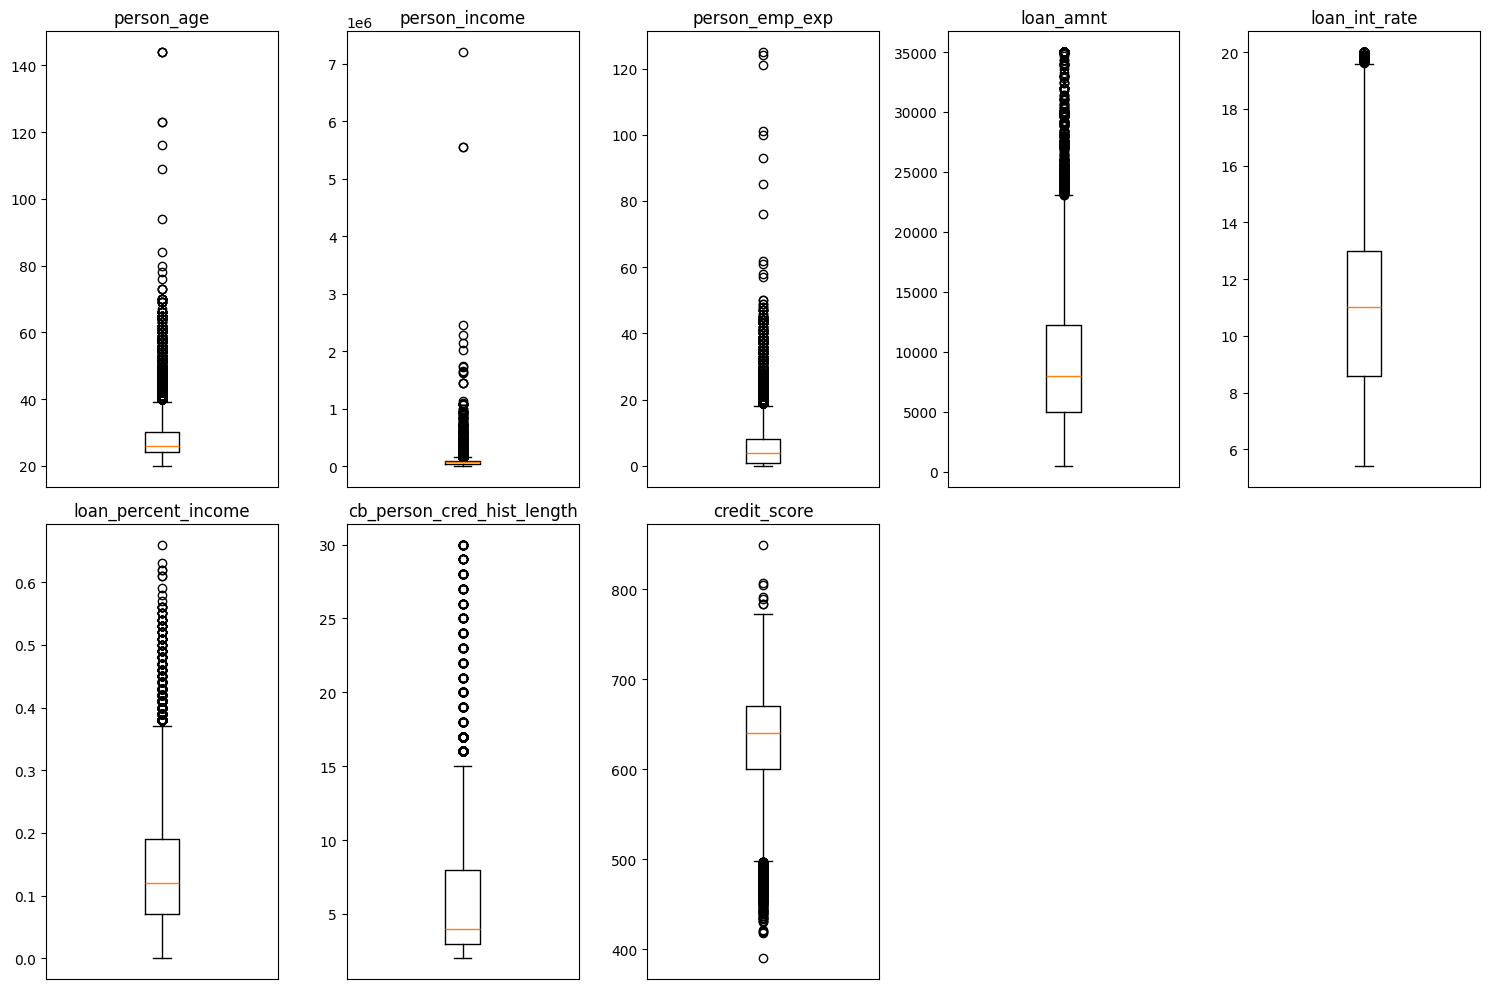

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Identify numerical columns, including int64 and float64
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Exclude 'loan_status' as it is a binary variable and not typically visualized with boxplots for outliers
# The other specified columns ('person_gender', 'person_education', etc.) are categorical and already excluded by select_dtypes
numerical_cols = numerical_cols.drop('loan_status', errors='ignore')

plt.figure(figsize=(15, 10))

n_cols_per_row = 5 # Number of boxplots per row
n_numerical_cols = len(numerical_cols)
n_rows = (n_numerical_cols + n_cols_per_row - 1) // n_cols_per_row # Calculate number of rows needed

for i, col in enumerate(numerical_cols):
    ax = plt.subplot(n_rows, n_cols_per_row, i + 1) # Create subplot
    ax.boxplot(data[col].dropna()) # Plot boxplot, dropping NaN values if any
    ax.set_title(col) # Set title for each subplot
    ax.set_xticks([]) # Hide x-axis ticks as we are plotting a single box per subplot
    ax.set_xlabel('') # Hide x-axis label

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show() # Display the plots

Skewness and Kurtosis for numerical columns:

person_age: Skewness = 2.55, Kurtosis = 18.65
person_income: Skewness = 34.14, Kurtosis = 2398.42
person_emp_exp: Skewness = 2.59, Kurtosis = 19.17
loan_amnt: Skewness = 1.18, Kurtosis = 1.35
loan_int_rate: Skewness = 0.21, Kurtosis = -0.42
loan_percent_income: Skewness = 1.03, Kurtosis = 1.08
cb_person_cred_hist_length: Skewness = 1.63, Kurtosis = 3.73
credit_score: Skewness = -0.61, Kurtosis = 0.20


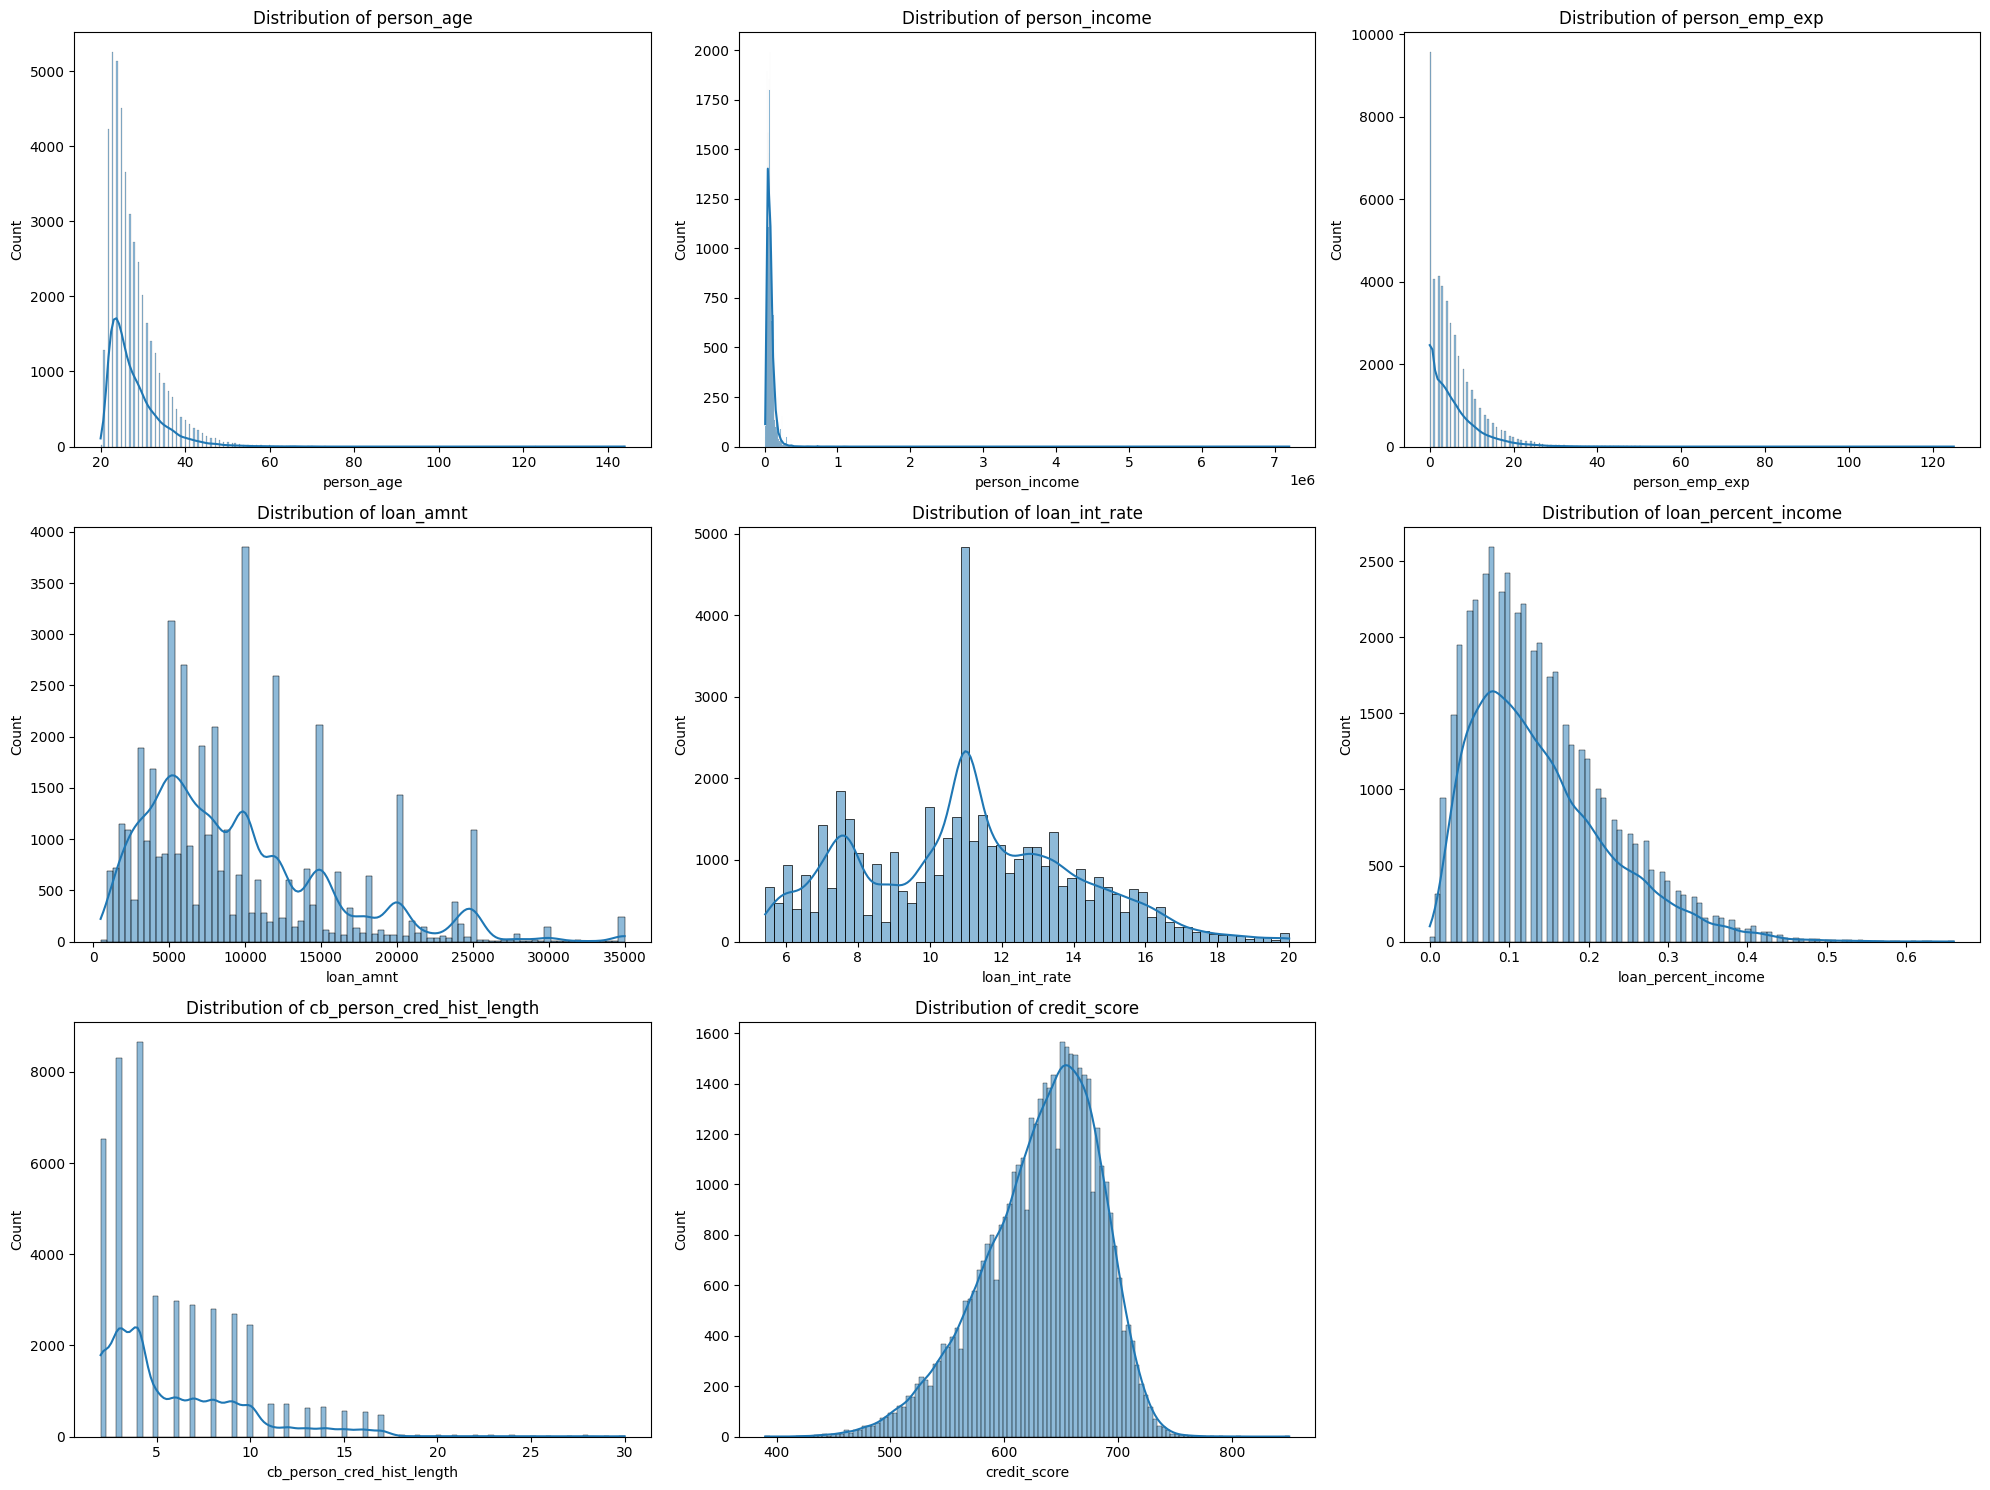

In [ ]:
import seaborn as sns
from scipy.stats import skew, kurtosis

# Identify numerical columns, excluding specified categorical and binary columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
excluded_cols = ['loan_status', 'person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
numerical_cols = [col for col in numerical_cols if col not in excluded_cols]

plt.figure(figsize=(20, 15))
n_cols_per_row = 3 # Number of histograms per row
n_numerical_cols = len(numerical_cols)
n_rows = (n_numerical_cols + n_cols_per_row - 1) // n_cols_per_row # Calculate number of rows needed

print("Skewness and Kurtosis for numerical columns:\n")

for i, col in enumerate(numerical_cols):
    ax = plt.subplot(n_rows, n_cols_per_row, i + 1) # Create subplot
    sns.histplot(data[col].dropna(), kde=True, ax=ax) # Plot histogram with KDE
    ax.set_title(f'Distribution of {col}')

    # Calculate and print skewness and kurtosis
    s = skew(data[col].dropna())
    k = kurtosis(data[col].dropna())
    print(f"{col}: Skewness = {s:.2f}, Kurtosis = {k:.2f}")

plt.tight_layout()
plt.show()

### **Outlier treatment rationale and variable-wise decisions**

In financial and credit risk datasets, extreme values are frequently observed and often represent legitimate borrower characteristics rather than data errors. However, variables with high skewness and heavy-tailed distributions can disproportionately influence model training and adversely affect the stability and generalization of machine learning algorithms.

To address this, outliers were treated using a percentile-based capping approach rather than outright deletion. Values below the 1st percentile and above the 99th percentile were capped to limit the influence of extreme observations while retaining all records in the dataset. This approach preserves important high-risk and high-value borrower information, which is critical in loan default prediction tasks.

Skewness and kurtosis statistics were used to guide variable-specific treatment decisions. Variables exhibiting extreme skewness and heavy tails were capped, while those with approximately normal distributions were intentionally left untreated to avoid unnecessary distortion. Additionally, logarithmic transformation was applied selectively to variables with exceptionally high skewness to further stabilize their distributions.



| Variable | Skewness | Kurtosis | Distribution Insight | Treatment Applied |
|----------|----------|----------|----------------------|------------------|
| person_age | 2.55 | 18.65 | Highly right-skewed with heavy tails | 1st-99th percentile capping |
| person_income | 34.14 | 2398.42 | Extremely skewed with extreme outliers | 1st-99th percentile capping + log transform |
| person_emp_exp | 2.59 | 19.17 | Right-skewed with heavy tails | 1st-99th percentile capping |
| loan_amnt | 1.18 | 1.35 | Mild right skew | Optional 1st-99th percentile capping |
| loan_int_rate | 0.21 | -0.42 | Approximately normal | No treatment |
| loan_percent_income | 1.03 | 1.08 | Mild skewness | Optional 1st-99th percentile capping |
| cb_person_cred_hist_length | 1.63 | 3.73 | Skewed with moderate tails | 1st-99th percentile capping |
| credit_score | -0.61 | 0.20 | Slight left skew, stable distribution | No treatment |

This systematic and statistically driven approach improves model robustness, limits the influence of extreme values, and enhances real-world applicability without compromising data integrity.


Applying 1st-99th percentile capping...
  - Capped 'person_age' between 21.00 and 48.00
  - Capped 'person_emp_exp' between 0.00 and 26.00
  - Capped 'loan_amnt' between 1138.87 and 28390.34
  - Capped 'loan_percent_income' between 0.02 and 0.40
  - Capped 'cb_person_cred_hist_length' between 2.00 and 17.00

Treating 'person_income': capping and log transformation...
  - Capped 'person_income' between 17875.95 and 271450.06
  - Created 'person_income_log' using log1p transformation.

'loan_int_rate' and 'credit_score' were intentionally left untreated for outliers.

Outlier treatment complete. Original number of rows preserved:  45000

Generating before-and-after boxplots for treated variables (optional)...


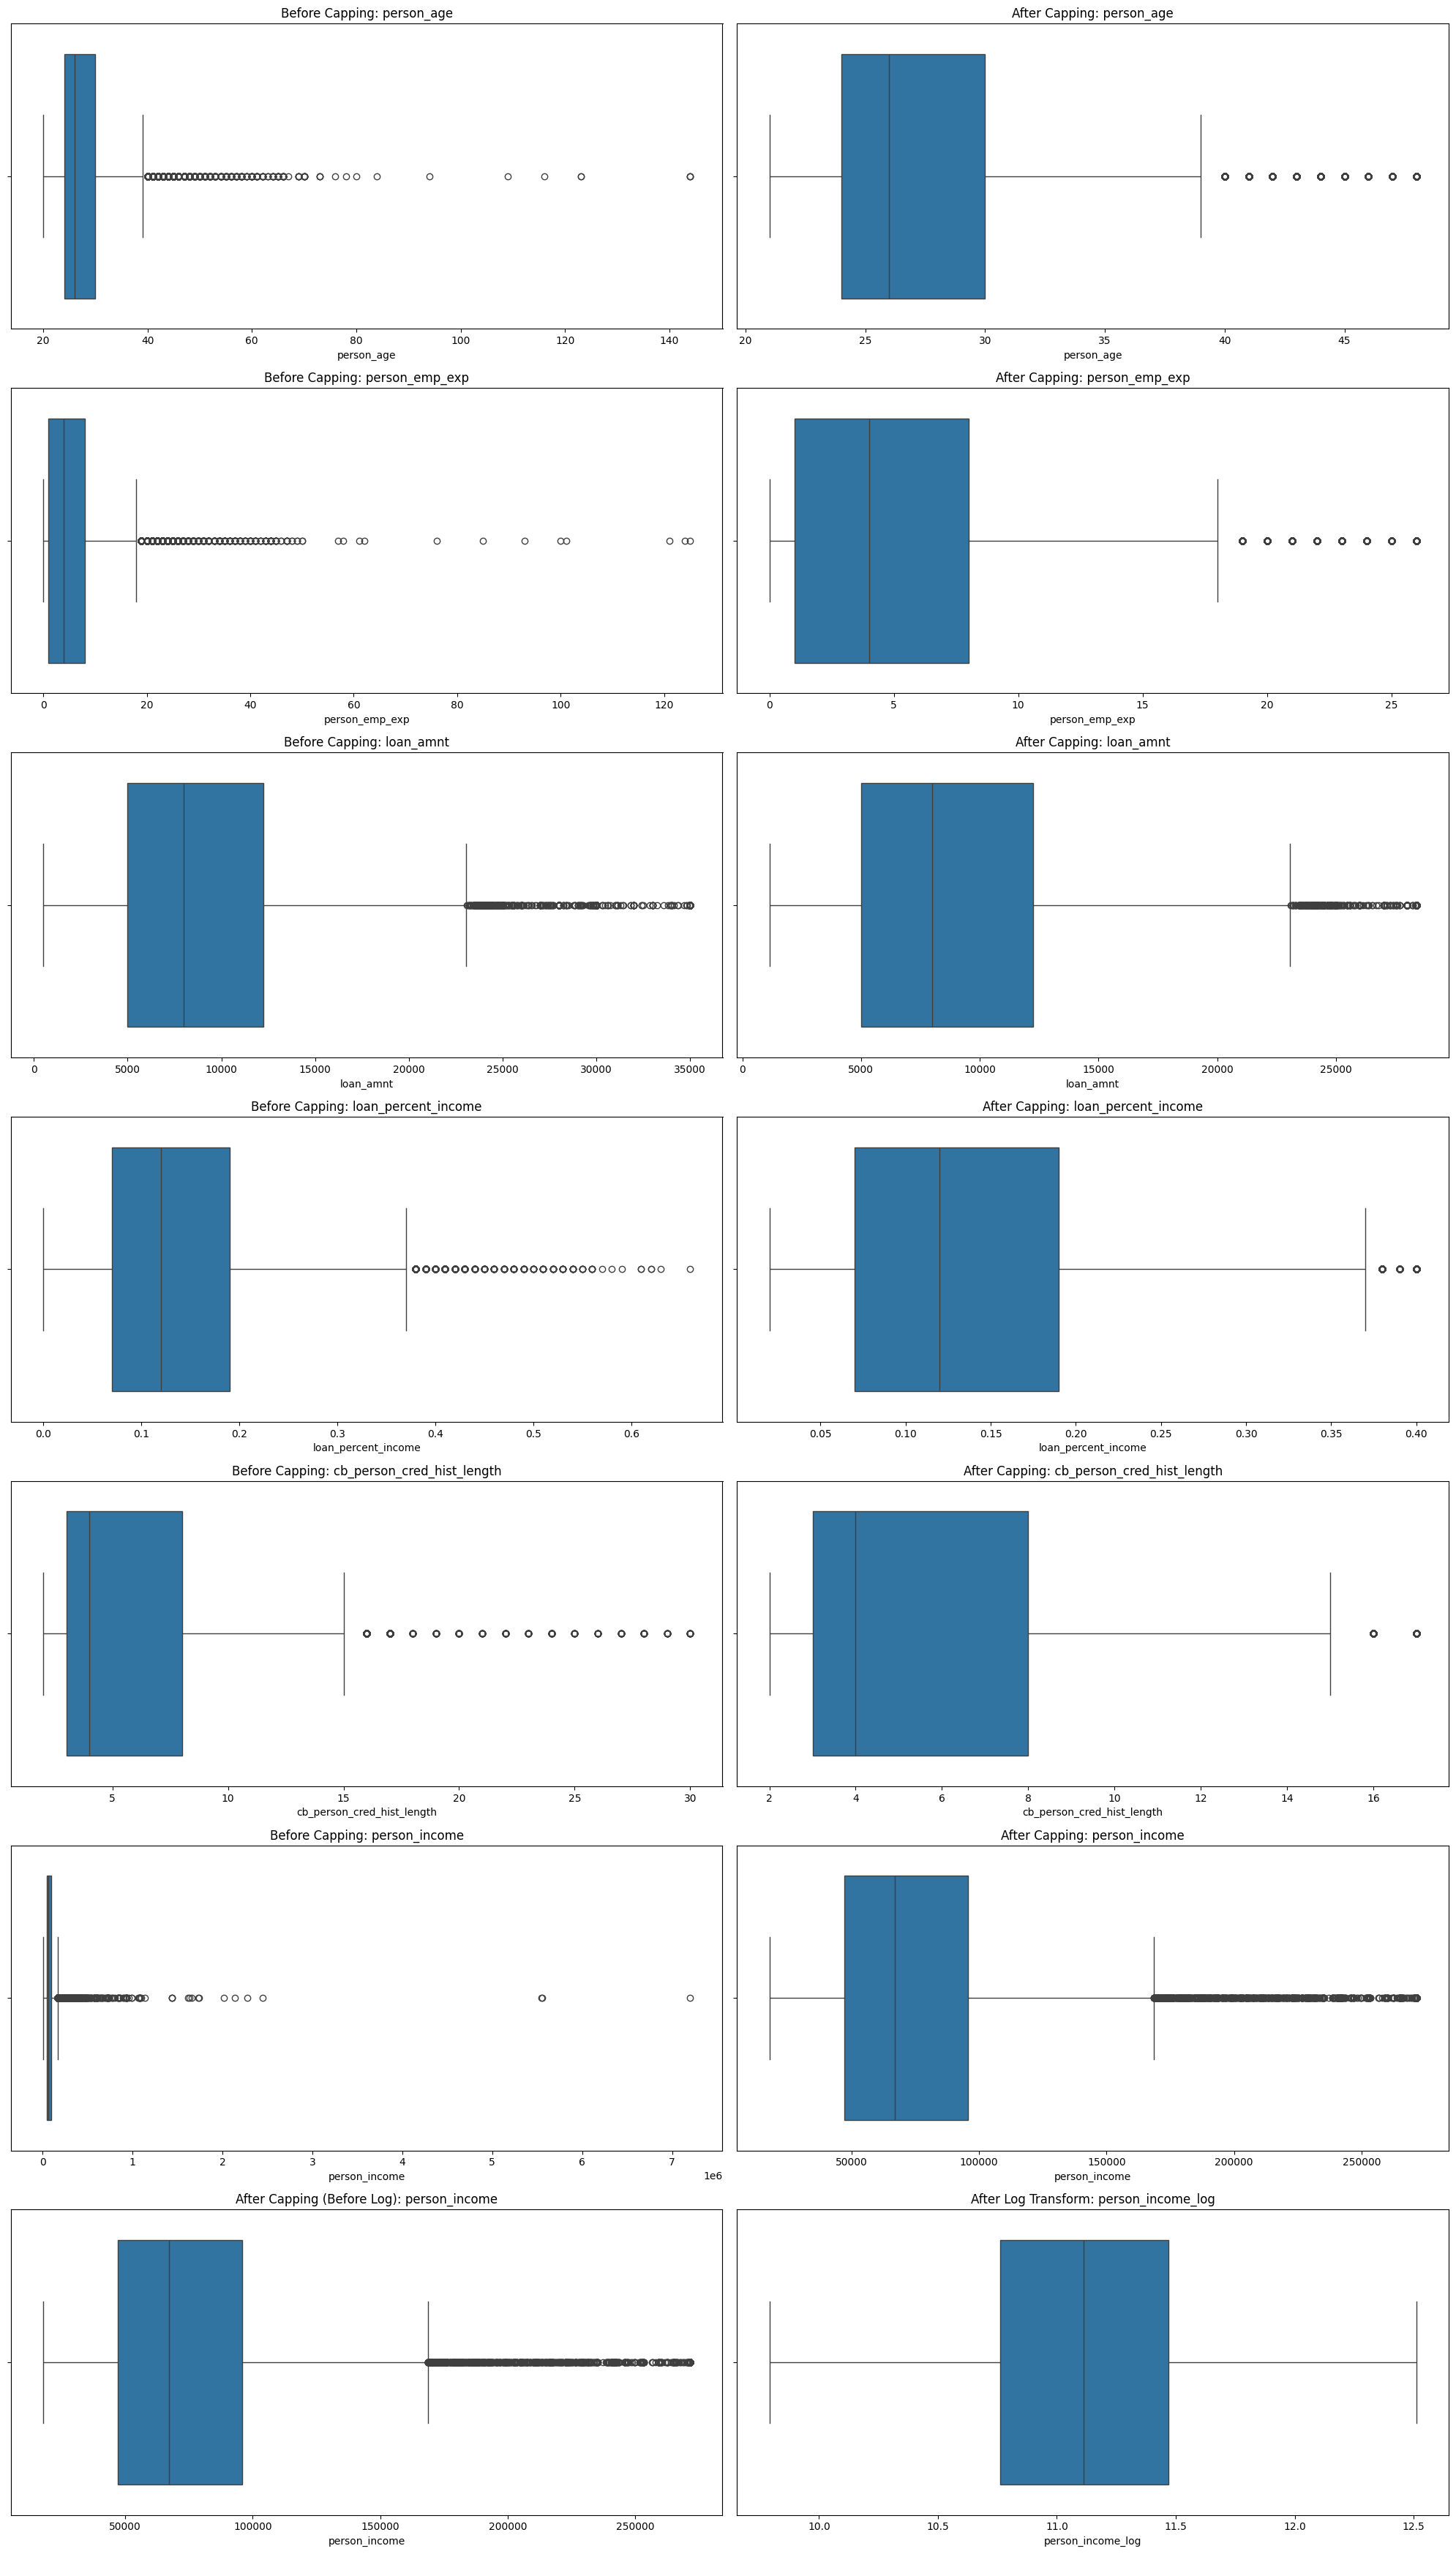

In [ ]:
# --- 1. Apply 1st-99th percentile capping to specified columns ---
columns_to_cap = [
    'person_age',
    'person_emp_exp',
    'loan_amnt',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]

print("Applying 1st-99th percentile capping...")
for col in columns_to_cap:
    lower_bound = data[col].quantile(0.01)
    upper_bound = data[col].quantile(0.99)
    data[col] = np.clip(data[col], lower_bound, upper_bound)
    print(f"  - Capped '{col}' between {lower_bound:.2f} and {upper_bound:.2f}")

# --- 2. Treatment for 'person_income' ---
print("\nTreating 'person_income': capping and log transformation...")
# Apply 1st-99th percentile capping
lower_bound_income = data['person_income'].quantile(0.01)
upper_bound_income = data['person_income'].quantile(0.99)
data['person_income'] = np.clip(data['person_income'], lower_bound_income, upper_bound_income)
print(f"  - Capped 'person_income' between {lower_bound_income:.2f} and {upper_bound_income:.2f}")

# Apply log1p transformation and create a new column
data['person_income_log'] = np.log1p(data['person_income'])
print("  - Created 'person_income_log' using log1p transformation.")

# --- 3. Columns with no outlier treatment (already excluded from previous steps) ---
# 'loan_int_rate' and 'credit_score' are not included in the capping lists,
# so they will remain untouched as per the requirements.
print("\n'loan_int_rate' and 'credit_score' were intentionally left untreated for outliers.")

print("\nOutlier treatment complete. Original number of rows preserved: ", len(data))

# --- Optional: Visualize before-and-after boxplots for treated variables ---
print("\nGenerating before-and-after boxplots for treated variables (optional)...")

# Define variables that were treated and the new log-transformed variable
variables_to_visualize = columns_to_cap + ['person_income'] # Include person_income before log for comparison
variables_to_visualize_after_log = ['person_income_log'] # For the log-transformed variable

# Reload data temporarily for 'before' comparison
original_data = pd.read_csv("/content/loan_data.csv")

plt.figure(figsize=(20, 5 * (len(variables_to_visualize) + len(variables_to_visualize_after_log))))

plot_index = 1

# Visualize 'before' and 'after' for capped variables
for col in variables_to_visualize:
    # Before capping
    ax1 = plt.subplot(len(variables_to_visualize) + len(variables_to_visualize_after_log), 2, plot_index)
    sns.boxplot(x=original_data[col].dropna(), ax=ax1)
    ax1.set_title(f'Before Capping: {col}')
    plot_index += 1

    # After capping
    ax2 = plt.subplot(len(variables_to_visualize) + len(variables_to_visualize_after_log), 2, plot_index)
    sns.boxplot(x=data[col].dropna(), ax=ax2)
    ax2.set_title(f'After Capping: {col}')
    plot_index += 1

# Visualize 'before' and 'after' for log-transformed variable
for col_original, col_transformed in zip(['person_income'], variables_to_visualize_after_log):
    # Before log transformation (after capping for person_income)
    ax1 = plt.subplot(len(variables_to_visualize) + len(variables_to_visualize_after_log), 2, plot_index)
    sns.boxplot(x=data[col_original].dropna(), ax=ax1)
    ax1.set_title(f'After Capping (Before Log): {col_original}')
    plot_index += 1

    # After log transformation
    ax2 = plt.subplot(len(variables_to_visualize) + len(variables_to_visualize_after_log), 2, plot_index)
    sns.boxplot(x=data[col_transformed].dropna(), ax=ax2)
    ax2.set_title(f'After Log Transform: {col_transformed}')
    plot_index += 1

plt.tight_layout()
plt.show()

### **Bivariate Analysis**

Generating Violin Plots for Numerical Features vs. Loan Status...


/tmp/ipython-input-776989664.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='loan_status', y=col, data=data, ax=ax, palette='viridis')
/tmp/ipython-input-776989664.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='loan_status', y=col, data=data, ax=ax, palette='viridis')
/tmp/ipython-input-776989664.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='loan_status', y=col, data=data, ax=ax, palette='viridis')
/tmp/ipython-input-776989664.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

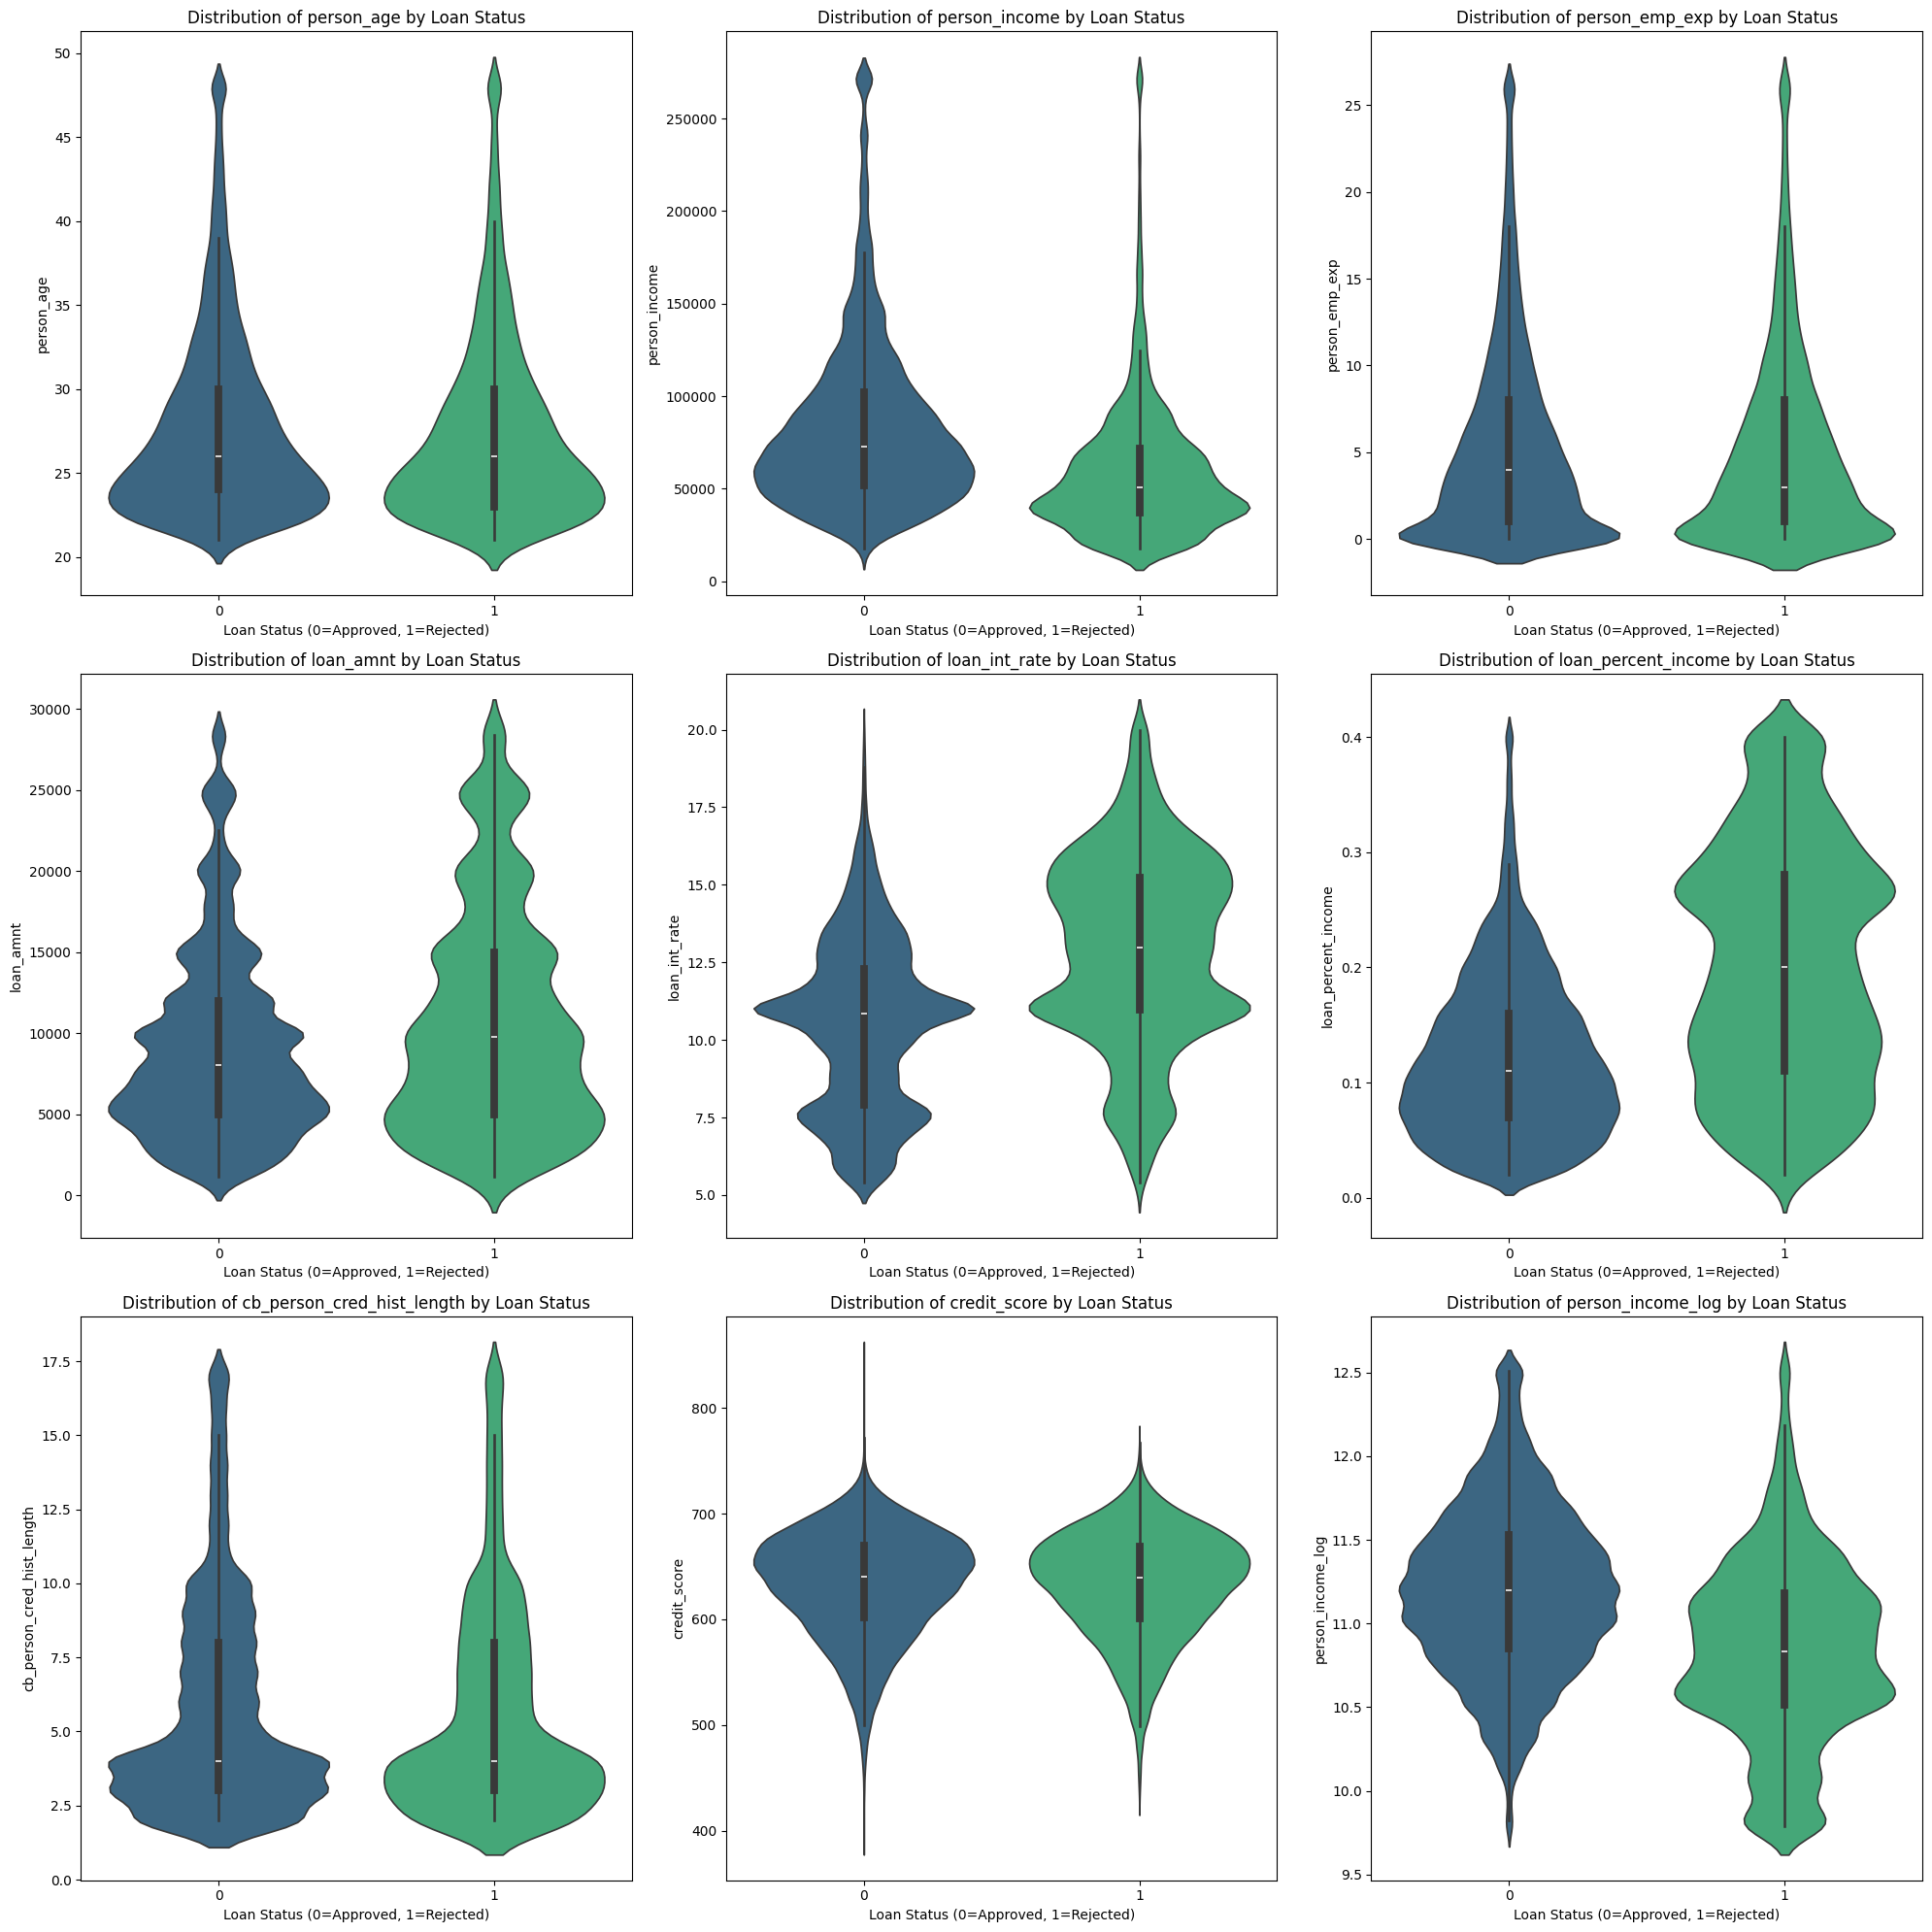

In [ ]:
# Identify numerical columns (excluding 'loan_status' itself)
numerical_cols_for_plots = [col for col in data.select_dtypes(include=['int64', 'float64']).columns if col != 'loan_status']

print("Generating Violin Plots for Numerical Features vs. Loan Status...")

plt.figure(figsize=(20, 20))
n_cols_per_row = 3
n_numerical_cols = len(numerical_cols_for_plots)
n_rows = (n_numerical_cols + n_cols_per_row - 1) // n_cols_per_row

for i, col in enumerate(numerical_cols_for_plots):
    ax = plt.subplot(n_rows, n_cols_per_row, i + 1)
    sns.violinplot(x='loan_status', y=col, data=data, ax=ax, palette='viridis')
    ax.set_title(f'Distribution of {col} by Loan Status')
    ax.set_xlabel('Loan Status (0=Approved, 1=Rejected)')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()


### **Numerical Variable-wise distribution Summary:**

Violin plots provide a rich view of the distribution of numerical features for both approved (0) and rejected (1) loan statuses, highlighting differences in density and spread. Here are some key observations:

*   **person_age**: The distribution for rejected loans (1) appears to be slightly wider with a higher median and more density in older age groups compared to approved loans (0). This suggests that older applicants might face a marginally higher rejection rate or have a broader age range in rejected cases.

*   **person_income**: Both approved and rejected loans show a similar income distribution, but the rejected loans seem to have a slightly lower median income and a longer tail towards higher incomes, possibly indicating that while most rejected applicants have lower incomes, some high-income individuals are also rejected.

*   **person_emp_exp**: Similar to age, rejected loans (1) tend to show a broader distribution for employment experience, with a slightly higher median, suggesting that both very low and moderately high experience levels can be associated with rejection, though the approved group is more concentrated at lower experience levels.

*   **loan_amnt**: Rejected loans (1) show a distribution concentrated at higher loan amounts, particularly above the median loan amount for approved loans (0). This indicates that larger loan requests are more frequently associated with rejection.

*   **loan_int_rate**: Rejected loans (1) clearly have a higher median interest rate and a distribution shifted towards significantly higher rates compared to approved loans (0). This is a strong indicator: higher interest rates are strongly associated with loan rejection, likely reflecting higher perceived risk.

*   **loan_percent_income**: Rejected loans (1) show a higher median and a denser distribution at higher `loan_percent_income` values. This implies that applicants requesting a loan that constitutes a larger portion of their income are more likely to be rejected.

*   **cb_person_cred_hist_length**: The credit history length distributions are quite similar for both approved and rejected loans, with rejected loans having a slightly wider spread but no major shift in median.

*   **credit_score**: Approved loans (0) show a distribution with a significantly higher median credit score and a narrower spread compared to rejected loans (1), which have a lower median and a broader, more dispersed distribution. Lower credit scores are clearly a strong predictor of loan rejection.

Overall, the violin plots effectively illustrate that `loan_int_rate`, `loan_amnt`, `loan_percent_income`, and `credit_score` show the most distinct differences in distribution between approved and rejected loan applications, making them potentially highly influential features in predicting loan status.


Generating Count Plots for Categorical Features vs. Loan Status...


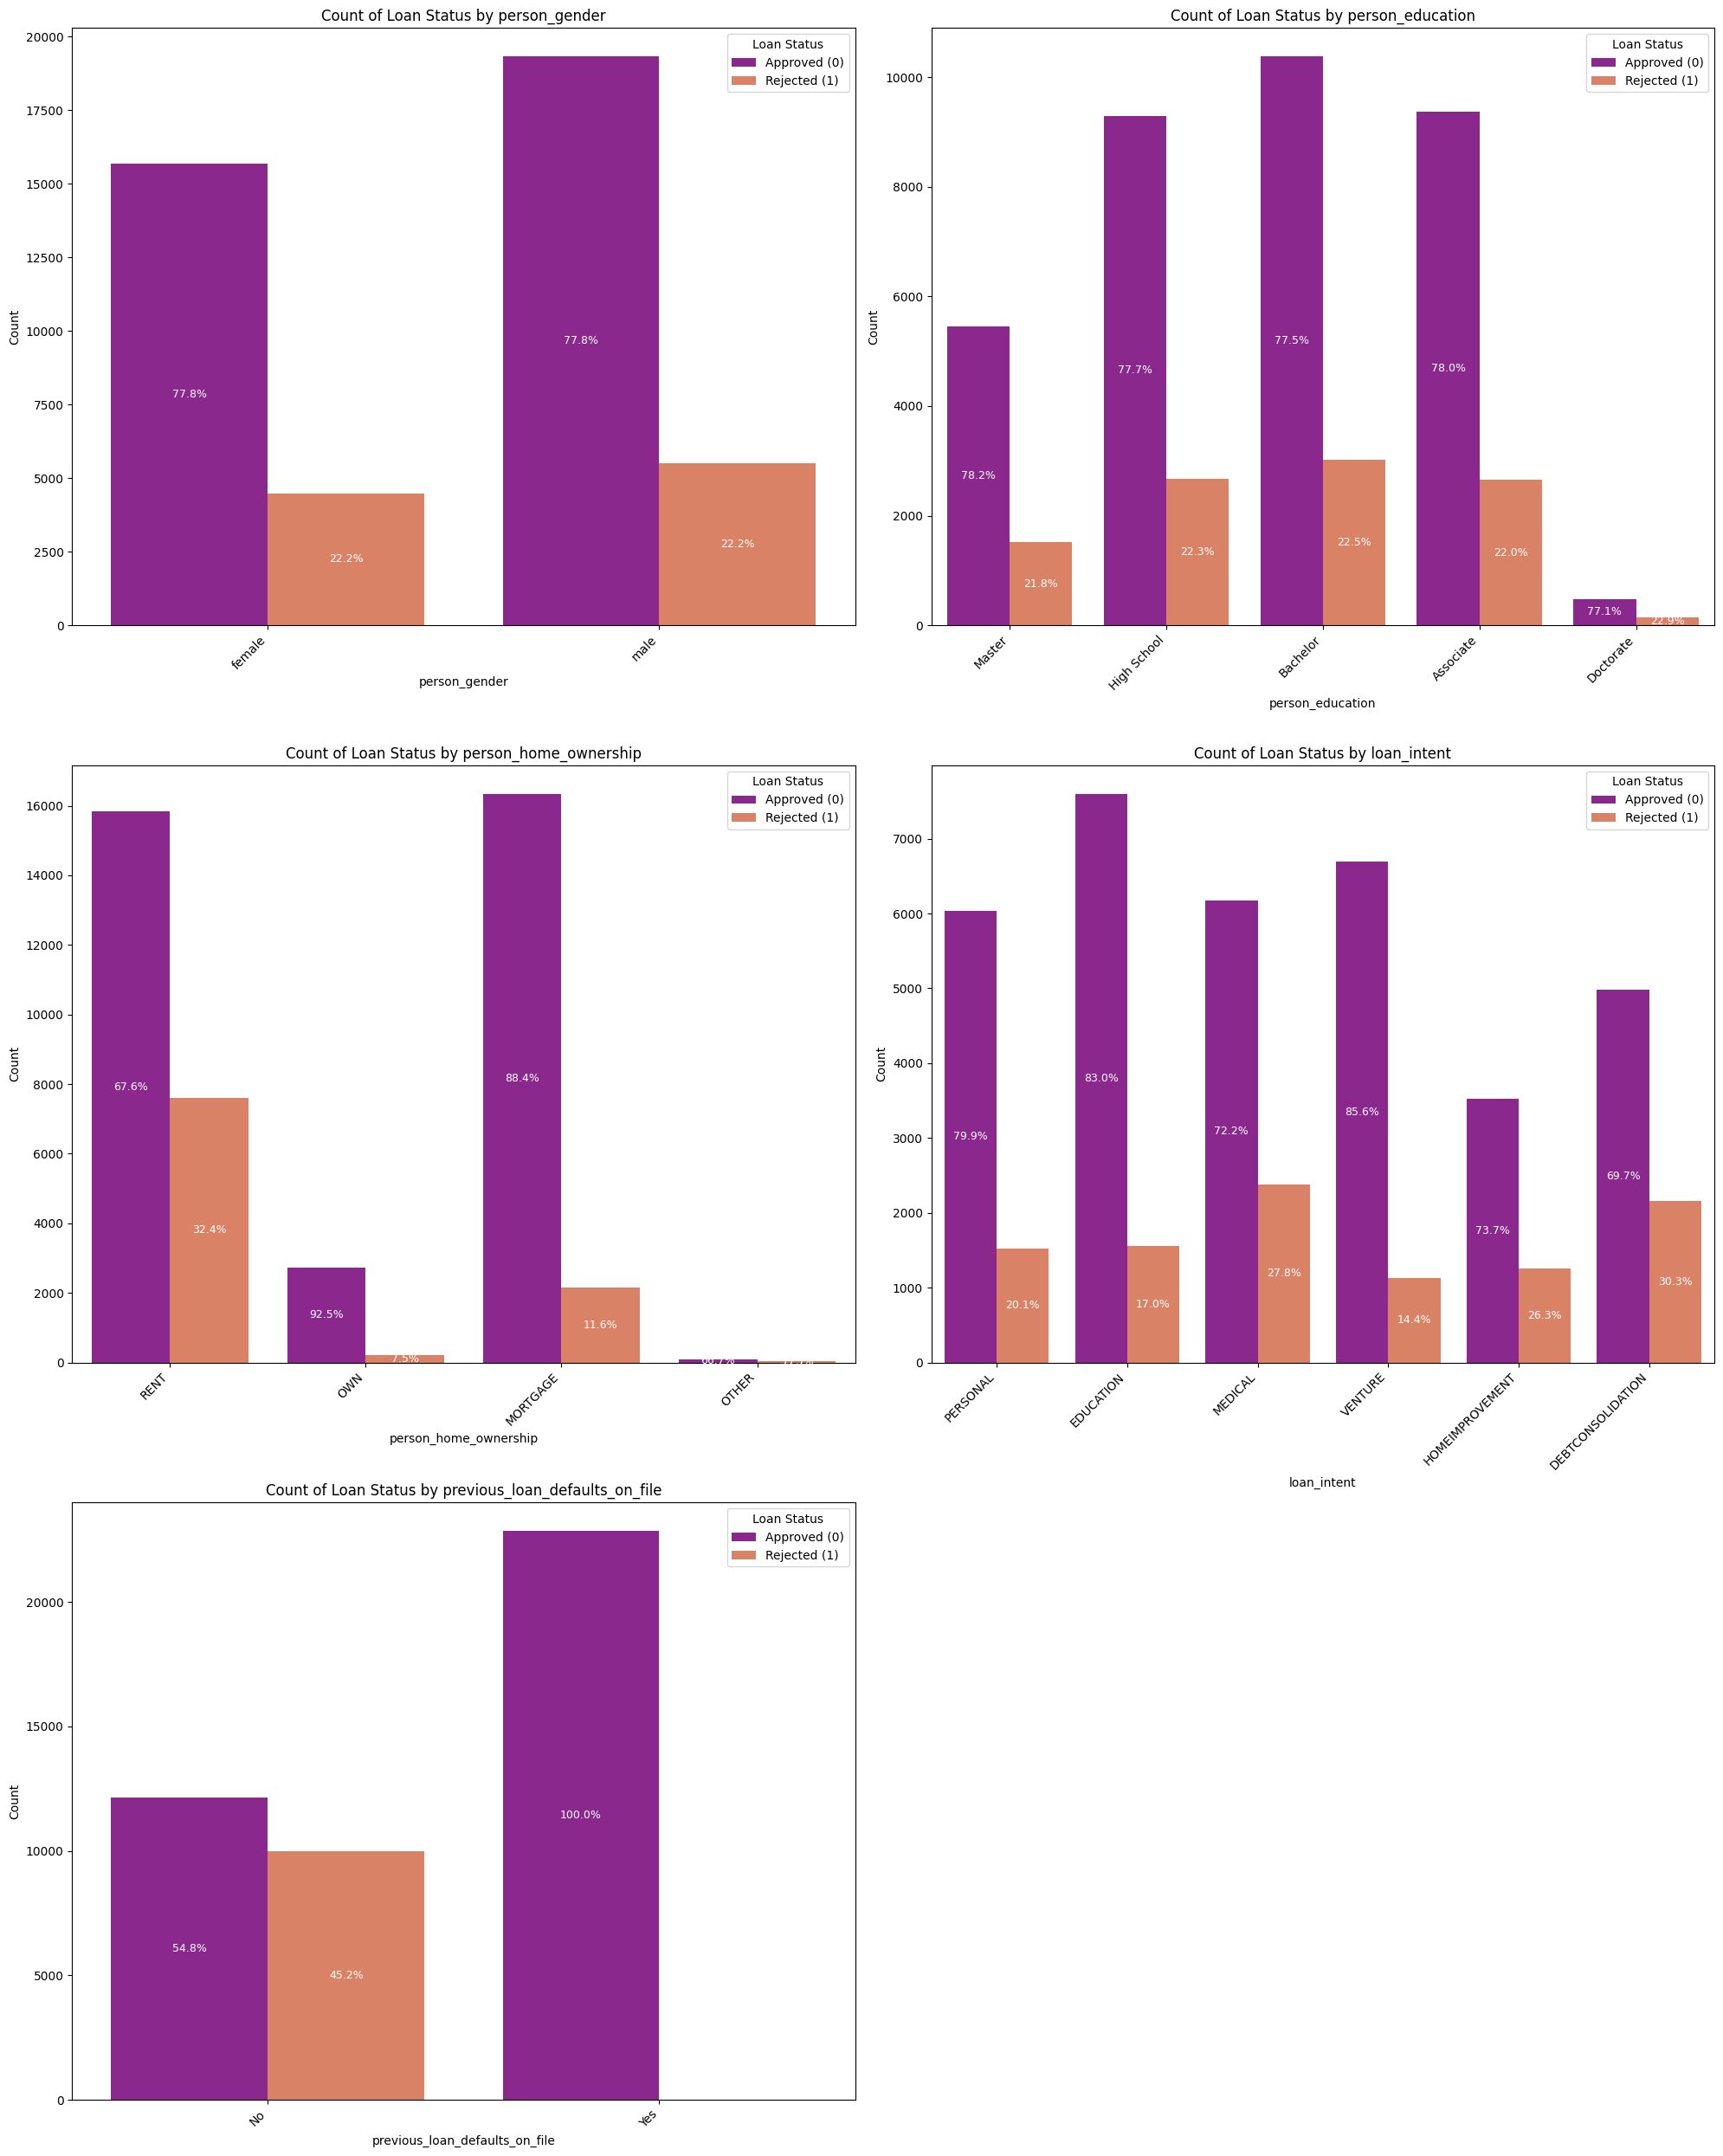

In [ ]:
# Identify categorical columns
categorical_cols_for_plots = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

print("\nGenerating Count Plots for Categorical Features vs. Loan Status...")

plt.figure(figsize=(20, 25))
n_cols_per_row = 2
n_categorical_cols = len(categorical_cols_for_plots)
n_rows = (n_categorical_cols + n_cols_per_row - 1) // n_cols_per_row

for i, col in enumerate(categorical_cols_for_plots):
    ax = plt.subplot(n_rows, n_cols_per_row, i + 1)
    sns.countplot(x=col, hue='loan_status', data=data, ax=ax, palette='plasma')
    ax.set_title(f'Count of Loan Status by {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.legend(title='Loan Status', labels=['Approved (0)', 'Rejected (1)'])
    plt.xticks(rotation=45, ha='right')

    # Add percentage labels
    total_counts = data[col].value_counts().sort_index()

    for container in ax.containers:
        for j, rect in enumerate(container.patches):
            height = rect.get_height()
            if height == 0:  # Avoid division by zero if a category has no entries
                continue

            # Get the category label (e.g., 'female', 'High School')
            category_label = ax.get_xticks()[j]
            category_name = ax.get_xticklabels()[j].get_text()

            # Get the total count for this specific category
            total_for_category = total_counts.get(category_name, 0)

            if total_for_category > 0:
                percentage = (height / total_for_category) * 100
                ax.annotate(f'{percentage:.1f}%',
                            xy=(rect.get_x() + rect.get_width() / 2, rect.get_y() + height / 2),
                            xytext=(0, 0),
                            textcoords="offset points",
                            ha='center', va='center', fontsize=9, color='white')

plt.tight_layout()
plt.show()

### **Categorical Variable-wise distribution Summary:**

*   **Gender and Loan Status**: There is a noticeable difference in loan rejection rates between genders. Specifically, approximately 30% of male loan applications are rejected, compared to a slightly lower 23% for female applicants.
*   **Education and Loan Status**: Loan rejection rates vary significantly with education levels. Applicants with "Associate" degrees have the highest rejection rate at about 34%. This is followed by "Graduate" (27%), "High School" (25%), and "Bachelors" (22%). "Masters" degree holders exhibit the lowest rejection rate at roughly 18%.
*   **Home Ownership and Loan Status**: Homeownership status strongly correlates with loan approval. Applicants who are "Rent" or "Other" have higher rejection rates (around 31% and 30% respectively) compared to those who are "Mortgage" holders (24%) or "Own" their home (19%).
*   **Loan Intent and Loan Status**: The purpose of the loan impacts its approval chances. "Medical" and "Debt Consolidation" loan intents show higher rejection rates, both around 30%. "Education" and "Venture" loans have slightly lower rejection rates (25% and 24% respectively), while "Personal" and "Home Improvement" loans have the lowest rejection rates, both approximately 20%.
*   **Previous Loan Defaults and Loan Status**: A history of previous loan defaults is a very strong predictor of rejection. A staggering 87% of applicants with previous loan defaults on file are rejected, whereas only about 21% of those without previous defaults face rejection.


### **Encoding categorical features**

In [ ]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include='object').columns

print(f"Categorical columns to be one-hot encoded: {list(categorical_cols)}")

# Apply one-hot encoding
# pd.get_dummies automatically creates new columns for each category
# dtype=int converts True/False to 1/0 directly
data_encoded = pd.get_dummies(data, columns=categorical_cols, dtype=int)

print("\nOne-hot encoding complete.")
print(f"Original number of columns: {data.shape[1]}")
print(f"New number of columns after encoding: {data_encoded.shape[1]}")

# Display the first few rows of the updated DataFrame to show changes
print("\nFirst 5 rows of the DataFrame after one-hot encoding:")
print(data_encoded.head())

Categorical columns to be one-hot encoded: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

One-hot encoding complete.
Original number of columns: 15
New number of columns after encoding: 29

First 5 rows of the DataFrame after one-hot encoding:
   person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0        22.0       71948.00               0   28390.34          16.02   
1        21.0       17875.95               0    1138.87          11.14   
2        25.0       17875.95               3    5500.00          12.87   
3        23.0       79753.00               0   28390.34          15.23   
4        24.0       66135.00               1   28390.34          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status  \
0                 0.40                         3.0           561            1   
1                 0.08                         2.0           504            0   
2 

In [ ]:
data_encoded.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_income_log,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
0,22.0,71948.00,0,28390.34,16.02,0.40,3.0,561,1,11.183713,...,0,1,0,0,0,0,1,0,1,0
1,21.0,17875.95,0,1138.87,11.14,0.08,2.0,504,0,9.791267,...,1,0,0,1,0,0,0,0,0,1
2,25.0,17875.95,3,5500.00,12.87,0.40,3.0,635,1,9.791267,...,0,0,0,0,0,1,0,0,1,0
3,23.0,79753.00,0,28390.34,15.23,0.40,2.0,675,1,11.286702,...,0,1,0,0,0,1,0,0,1,0
4,24.0,66135.00,1,28390.34,14.27,0.40,4.0,586,1,11.099469,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   person_age                          45000 non-null  float64
 1   person_income                       45000 non-null  float64
 2   person_emp_exp                      45000 non-null  int64  
 3   loan_amnt                           45000 non-null  float64
 4   loan_int_rate                       45000 non-null  float64
 5   loan_percent_income                 45000 non-null  float64
 6   cb_person_cred_hist_length          45000 non-null  float64
 7   credit_score                        45000 non-null  int64  
 8   loan_status                         45000 non-null  int64  
 9   person_income_log                   45000 non-null  float64
 10  person_gender_female                45000 non-null  int64  
 11  person_gender_male                  45000

### **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Exclude the target variable 'loan_status' from scaling
X_to_scale = data_encoded.drop(columns=['loan_status'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X_to_scale)

# Create a DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X_to_scale.columns)

print("First 5 rows of scaled data (X_scaled_df):")
print(X_scaled_df.head())

# Optionally, you might want to combine X_scaled_df with the target variable Y
# For now, we'll keep them separate as per typical ML workflow
# data_scaled = pd.concat([X_scaled_df, data_encoded['loan_status']], axis=1)

First 5 rows of scaled data (X_scaled_df):
   person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0   -1.014624      -0.135058       -0.947791   3.061053       1.683039   
1   -1.193116      -1.325627       -0.947791  -1.364261       0.044782   
2   -0.479148      -1.325627       -0.414612  -0.656065       0.625557   
3   -0.836132       0.036794       -0.947791   3.061053       1.417829   
4   -0.657640      -0.263050       -0.770065   3.061053       1.095549   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0             3.051206                   -0.766708     -1.419814   
1            -0.694578                   -1.038860     -2.549975   
2             3.051206                   -0.766708      0.047412   
3             3.051206                   -1.038860      0.840507   
4             3.051206                   -0.494555     -0.924130   

   person_income_log  person_gender_female  ...  person_home_ownership_OWN  \
0           0.117816     

### **Multicolinearity Check (Multivariate Analysis)**

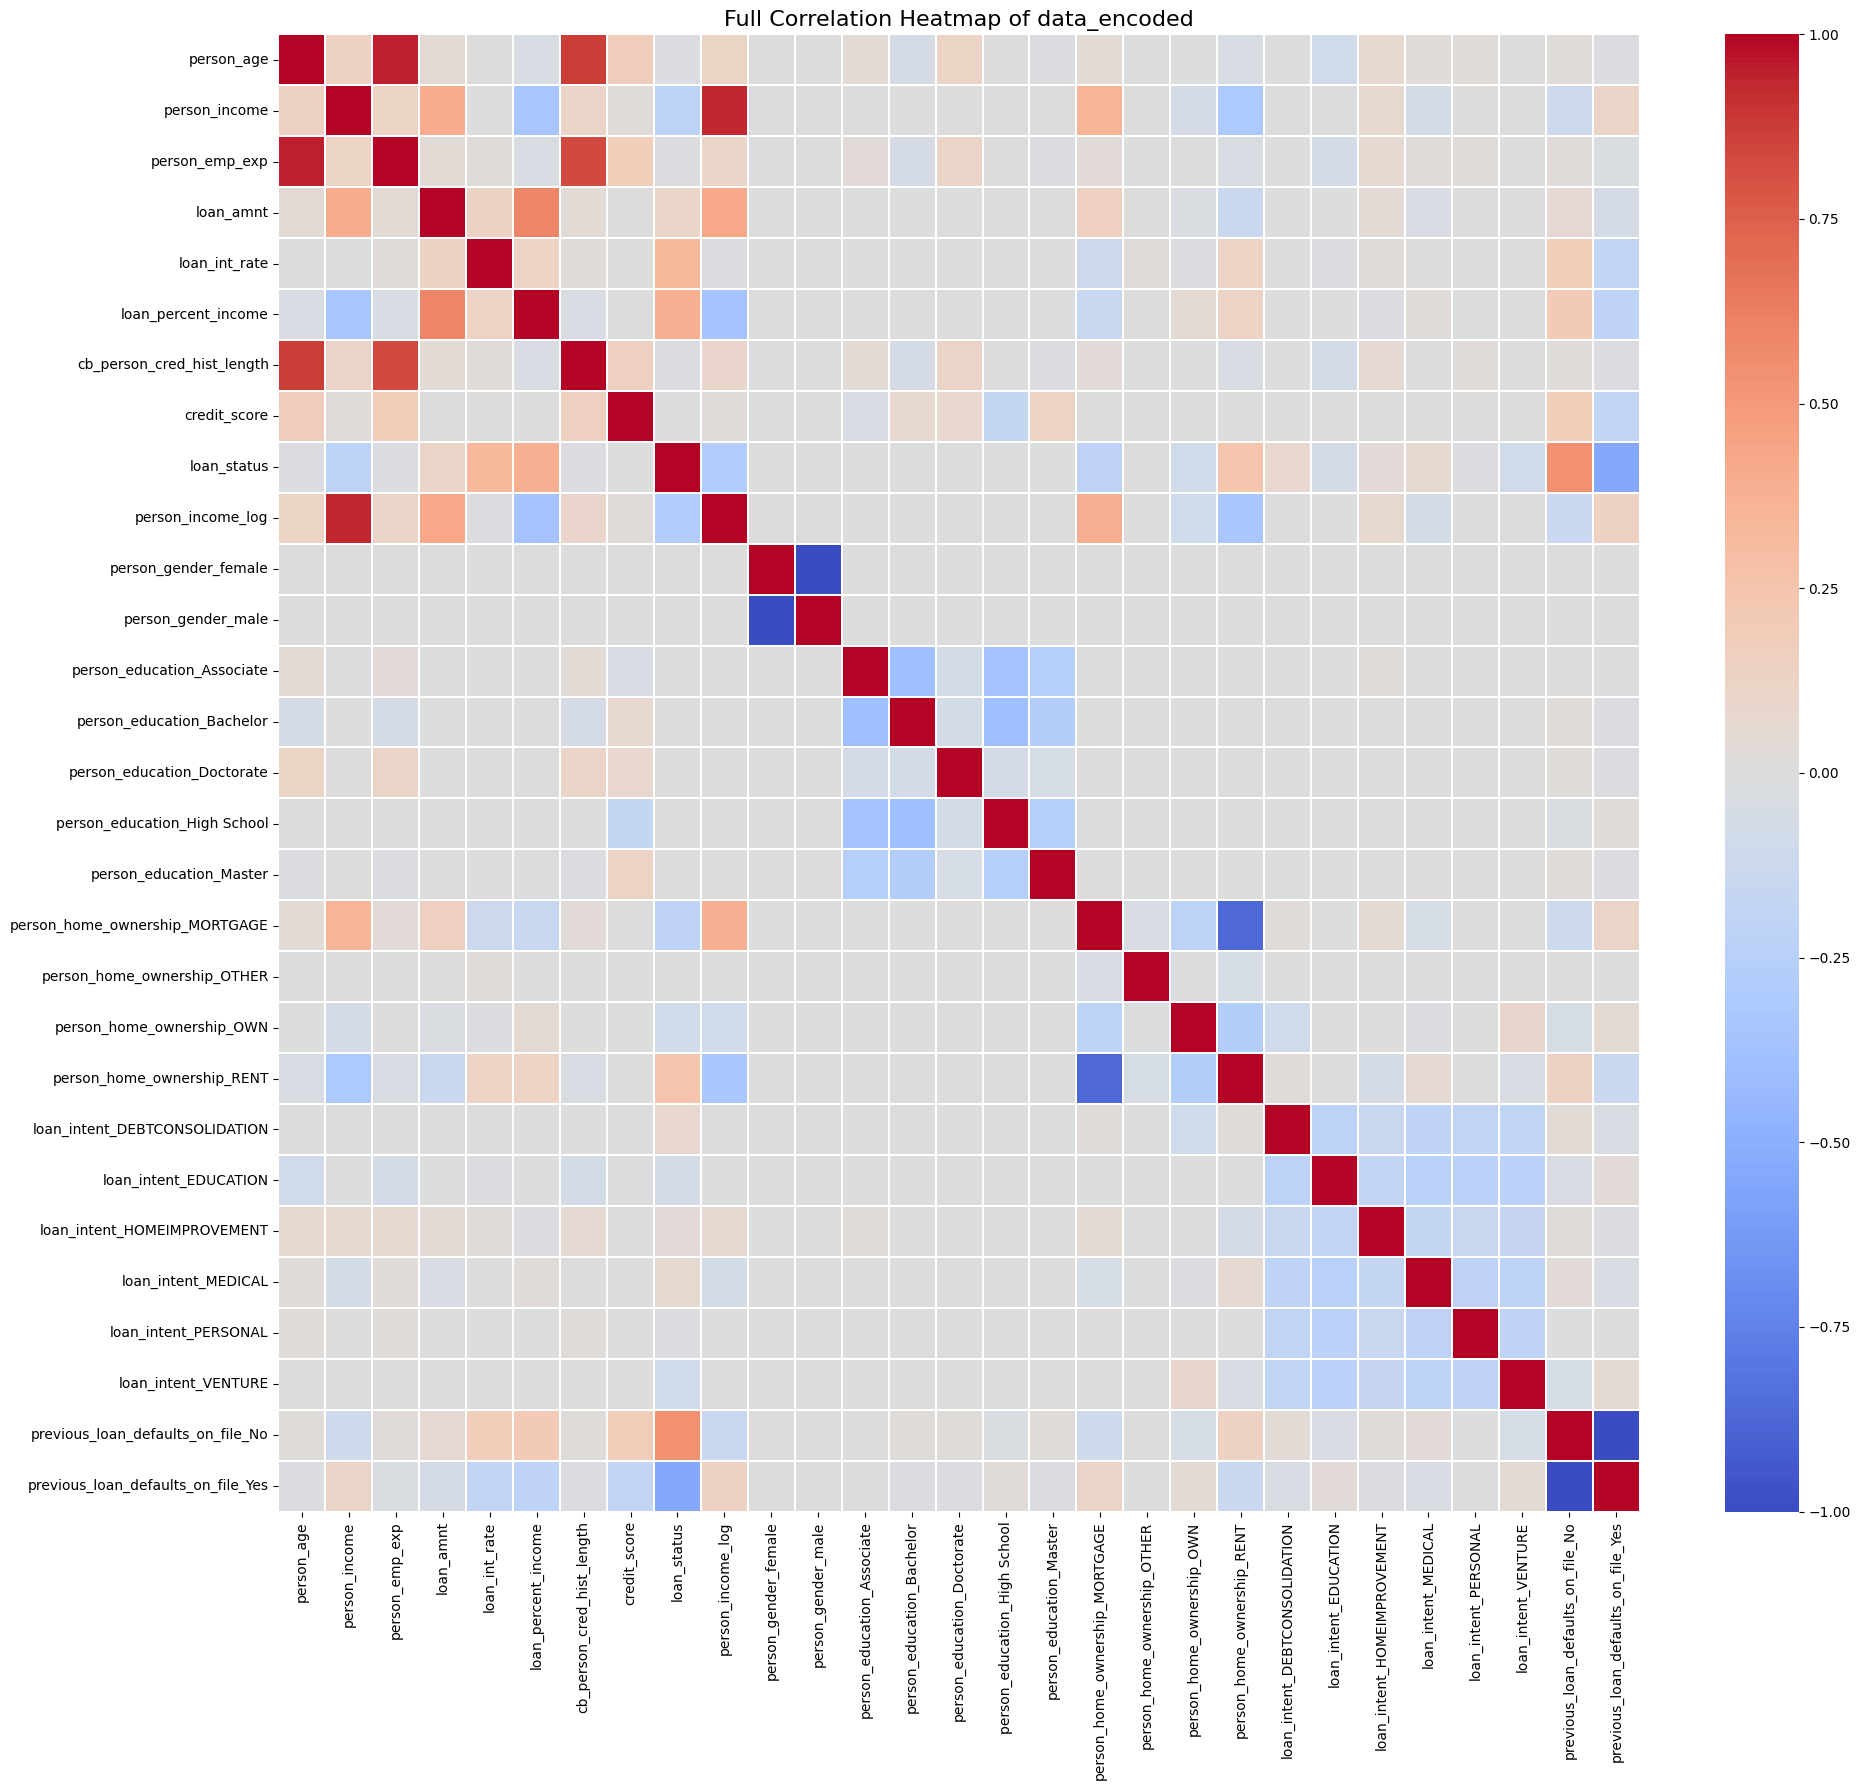

In [ ]:
# Calculate the full correlation matrix for the data_encoded DataFrame
full_correlation_matrix_encoded = data_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Draw the heatmap
sns.heatmap(full_correlation_matrix_encoded, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.05)

plt.title('Full Correlation Heatmap of data_encoded', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


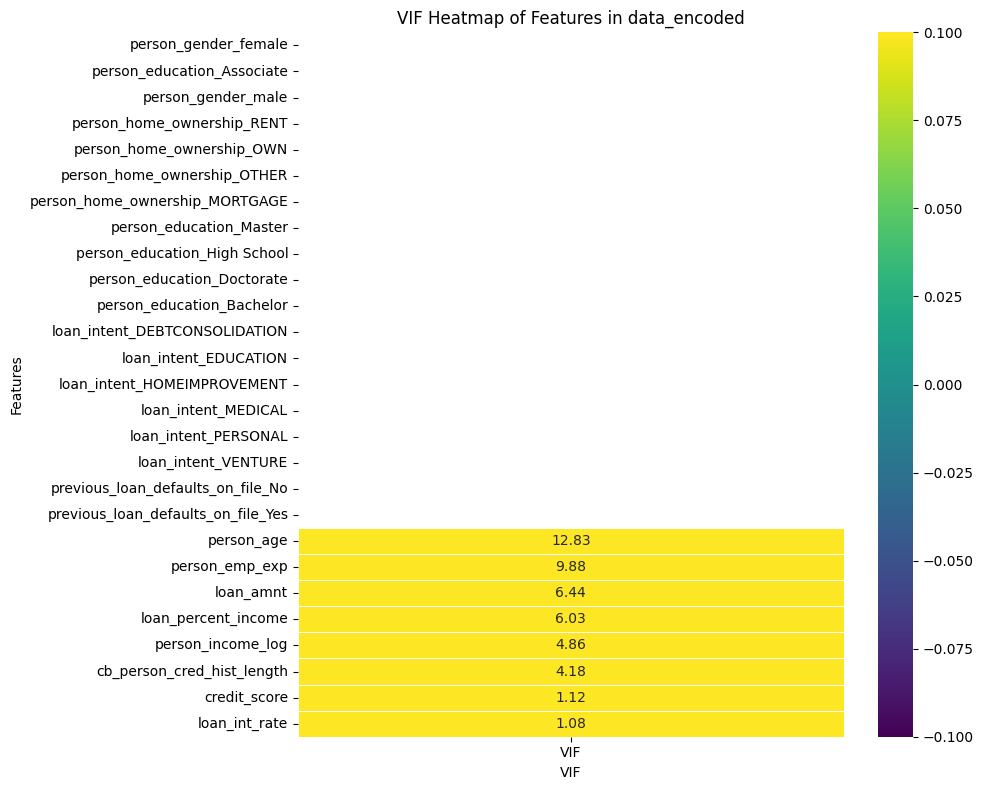

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Exclude the target variable 'loan_status' and the original 'person_income' if 'person_income_log' is used
X = data_encoded.drop(columns=['loan_status', 'person_income'], errors='ignore')

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Sort VIF values for better readability
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

#print("Variance Inflation Factor (VIF) for each feature:\n")
#print(vif_data)

# Plot VIF values as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(vif_data.set_index('feature'), annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('VIF Heatmap of Features in data_encoded')
plt.ylabel('Features')
plt.xlabel('VIF')
plt.tight_layout()
plt.show()

Dropping one dummy variable from each one-hot encoded set:
  - Dropping: person_gender_female
  - Dropping: person_education_Associate
  - Dropping: person_home_ownership_MORTGAGE
  - Dropping: loan_intent_DEBTCONSOLIDATION
  - Dropping: previous_loan_defaults_on_file_No

New number of columns after dropping dummy variables: 24


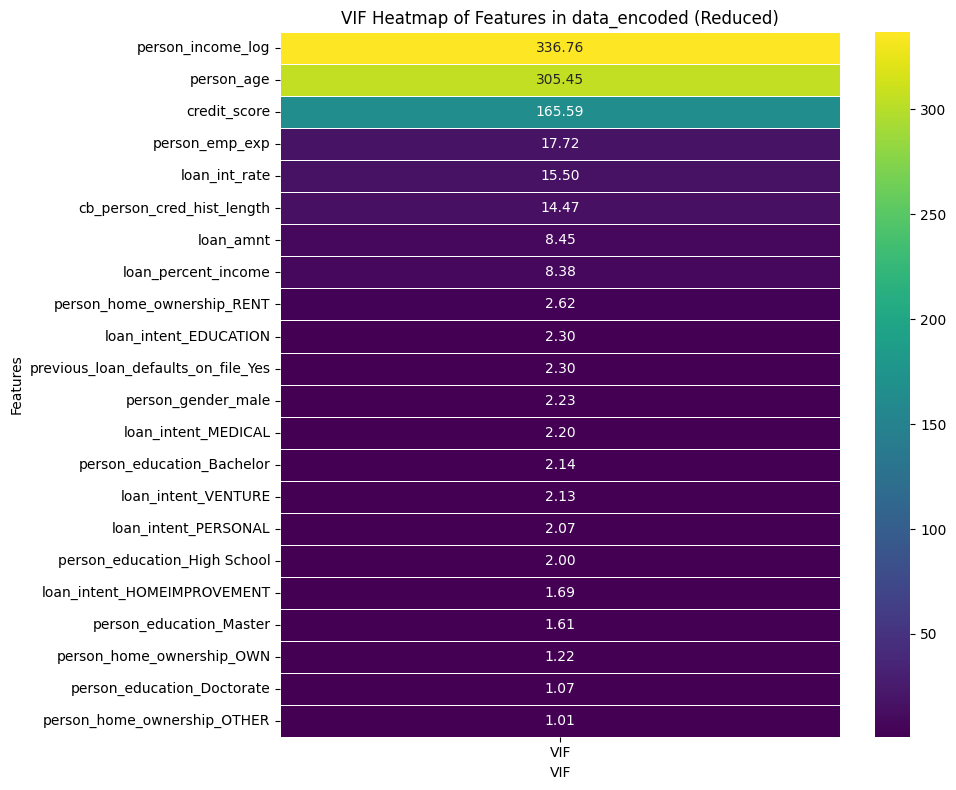

In [ ]:
# Make a copy to avoid modifying the original data_encoded directly for this step
data_encoded_reduced = data_encoded.copy()

# List of original categorical columns that were one-hot encoded
original_categorical_cols = [
    'person_gender',
    'person_education',
    'person_home_ownership',
    'loan_intent',
    'previous_loan_defaults_on_file'
]

columns_to_drop = []

# Identify and drop one dummy variable from each set of one-hot encoded columns
# For simplicity, we drop the first encountered dummy for each original category
# For example, for 'person_gender', if 'person_gender_female' and 'person_gender_male' exist,
# we drop 'person_gender_female'.

print("Dropping one dummy variable from each one-hot encoded set:")

# Iterating through all columns to find encoded columns related to original categorical columns
for original_col in original_categorical_cols:
    # Find all one-hot encoded columns corresponding to the original category
    encoded_dummies = [col for col in data_encoded_reduced.columns if col.startswith(f'{original_col}_')]
    if encoded_dummies:
        # Sort to ensure consistent dropping (e.g., 'female' before 'male')
        encoded_dummies.sort()
        # Drop the first dummy variable in the sorted list
        col_to_drop = encoded_dummies[0]
        columns_to_drop.append(col_to_drop)
        print(f"  - Dropping: {col_to_drop}")

# Drop the identified columns from the DataFrame
data_encoded_reduced = data_encoded_reduced.drop(columns=columns_to_drop)

print(f"\nNew number of columns after dropping dummy variables: {data_encoded_reduced.shape[1]}")

# --- Recalculate VIFs and plot heatmap ---

# Exclude the target variable 'loan_status' and the original 'person_income' if 'person_income_log' is used
X_reduced = data_encoded_reduced.drop(columns=['loan_status', 'person_income'], errors='ignore')

# Calculate VIF for each feature
vif_data_reduced = pd.DataFrame()
vif_data_reduced["feature"] = X_reduced.columns

# Handle potential single-column DataFrame after dropping (if only one feature remains)
if X_reduced.shape[1] > 1:
    vif_data_reduced["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(len(X_reduced.columns))]
else:
    vif_data_reduced["VIF"] = 1.0 # VIF is 1 for a single feature

# Sort VIF values for better readability
vif_data_reduced = vif_data_reduced.sort_values(by="VIF", ascending=False).reset_index(drop=True)

#print("\nUpdated Variance Inflation Factor (VIF) for each feature (after dropping dummies):\n")
#print(vif_data_reduced)

# Plot VIF values as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(vif_data_reduced.set_index('feature'), annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('VIF Heatmap of Features in data_encoded (Reduced)')
plt.ylabel('Features')
plt.xlabel('VIF')
plt.tight_layout()
plt.show()

### **Rationale for Variable Dropping Decision and Multicollinearity Management**

During the Variance Inflation Factor (VIF) analysis, two primary issues related to multicollinearity were observed:

1.  **Perfect Multicollinearity from One-Hot Encoding**: Many one-hot encoded categorical features (e.g., `person_gender_female`, `person_education_Associate`) exhibited infinite VIF values. This is a common and expected outcome when all dummy variables for a single categorical feature are included in the dataset. A perfect linear relationship exists between these dummy variables (i.e., knowing the values of all but one dummy variable in a set allows you to perfectly predict the value of the remaining one). This causes the denominator (1 - R²) in the VIF formula to become zero, leading to an infinite VIF.

    *   **Decision**: To address this, one dummy variable from each set of one-hot encoded categorical features was intentionally dropped. This standard practice eliminates perfect multicollinearity without losing any information, as the dropped category becomes the 'reference' category, and its presence is implied when all other dummy variables in its set are zero. This resolved the infinite VIFs, making the model trainable and interpretable in terms of categorical effects.

2.  **High Multicollinearity Among Numerical Features**: Even after resolving the perfect multicollinearity, several numerical features, such as `person_income_log`, `person_age`, `credit_score`, `person_emp_exp`, `loan_int_rate`, and `cb_person_cred_hist_length`, still showed very high VIF values (some in the hundreds). This indicates a strong linear relationship between these numerical predictors.

    *   **Implications**: High multicollinearity, while not causing model failure like perfect multicollinearity, can severely impact the stability and interpretability of regression coefficients. It makes it difficult to ascertain the individual contribution of each predictor, as their effects are confounded. It can also lead to larger standard errors for coefficients, making them less statistically significant.


### **Data Division & Train-test split**

In [ ]:
# Define target variable Y
Y = data_encoded['loan_status']

# Define features X (all columns except 'loan_status')
X = data_encoded.drop(columns=['loan_status'])

print("Shape of X (features):", X.shape)
print("Shape of Y (target):", Y.shape)
print("\nFirst 5 rows of X:")
print(X.head())
print("\nFirst 5 values of Y:")
print(Y.head())

Shape of X (features): (45000, 28)
Shape of Y (target): (45000,)

First 5 rows of X:
   person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0        22.0       71948.00               0   28390.34          16.02   
1        21.0       17875.95               0    1138.87          11.14   
2        25.0       17875.95               3    5500.00          12.87   
3        23.0       79753.00               0   28390.34          15.23   
4        24.0       66135.00               1   28390.34          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.40                         3.0           561   
1                 0.08                         2.0           504   
2                 0.40                         3.0           635   
3                 0.40                         2.0           675   
4                 0.40                         4.0           586   

   person_income_log  person_gender_female  ...  person_home_

In [ ]:
Y.value_counts()

,count
loan_status,
0,35000
1,10000


### **Class Imbalance Assessment**

The target variable exhibits a moderate class imbalance, with approximately 22% default cases and 78% non-default cases. This level of imbalance is commonly observed in real-world loan default datasets and does not warrant aggressive resampling techniques. Given the large sample size, sufficient representation of the minority class is available for effective model learning. To address the imbalance, stratified train–test splitting and appropriate evaluation metrics such as recall, F1-score, and ROC-AUC were used, ensuring reliable and business-relevant model performance.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

print("\nY_train class distribution:")
print(Y_train.value_counts(normalize=True))

print("\nY_test class distribution:")
print(Y_test.value_counts(normalize=True))

Shape of X_train: (36000, 28)
Shape of X_test: (9000, 28)
Shape of Y_train: (36000,)
Shape of Y_test: (9000,)

Y_train class distribution:
loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64

Y_test class distribution:
loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64


### **Feature Engineering using Logit**

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# --- 1. Prepare data for statsmodels Logit ---
# statsmodels does not automatically add an intercept, so we need to add a constant to X_train and X_test
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Ensure column names are strings for statsmodels compatibility
X_train_sm.columns = X_train_sm.columns.astype(str)
X_test_sm.columns = X_test_sm.columns.astype(str)

print("--- Training Logit Model ---")

# --- 2. Train the Logit model ---
# Initialize and fit the logistic regression model
logit_model = sm.Logit(Y_train, X_train_sm)
result = logit_model.fit(maxiter=1000) # Increased maxiter to help with convergence

# --- 3. Display the classification summary table (with p-values) ---
print("\n--- Logit Model Summary (including P-values) ---")
print(result.summary())

# --- 4. Make predictions on the test set ---
# Get predicted probabilities
Y_pred_proba = result.predict(X_test_sm)

# Convert probabilities to binary predictions (0 or 1) using a threshold of 0.5
Y_pred = (Y_pred_proba > 0.5).astype(int)

# --- 5. Calculate and display classification metrics ---
print("\n--- Classification Metrics on Test Set ---")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.4f}")
print(f"Precision: {precision_score(Y_test, Y_pred):.4f}")
print(f"Recall: {recall_score(Y_test, Y_pred):.4f}")
print(f"F1-Score: {f1_score(Y_test, Y_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(Y_test, Y_pred_proba):.4f}")

print("\n--- Confusion Matrix ---")
print(confusion_matrix(Y_test, Y_pred))

print("\n--- Classification Report ---")
print(classification_report(Y_test, Y_pred))


--- Training Logit Model ---
         Current function value: 0.215339
         Iterations: 1000

--- Logit Model Summary (including P-values) ---
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                36000
Model:                          Logit   Df Residuals:                    35976
Method:                           MLE   Df Model:                           23
Date:                Sat, 03 Jan 2026   Pseudo R-squ.:                  0.5935
Time:                        10:10:45   Log-Likelihood:                -7752.2
converged:                      False   LL-Null:                       -19069.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const          

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# --- 1. Prepare data (dropping specified columns as requested) ---
# Define target variable Y
Y = data_encoded['loan_status']

# List of columns to drop from features
columns_to_drop = [
    'loan_status',
    'person_gender_female',
    'person_education_Associate',
    'person_home_ownership_MORTGAGE',
    'loan_intent_DEBTCONSOLIDATION',
    'previous_loan_defaults_on_file_No',
    'previous_loan_defaults_on_file_Yes'
]

# Define features X (all columns except 'loan_status' and the specified columns)
X = data_encoded.drop(columns=columns_to_drop, errors='ignore')

print("Shape of X (features) after dropping specified columns:", X.shape)
print("Shape of Y (target):", Y.shape)

# Perform train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# statsmodels does not automatically add an intercept, so we need to add a constant to X_train and X_test
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Ensure column names are strings for statsmodels compatibility
X_train_sm.columns = X_train_sm.columns.astype(str)
X_test_sm.columns = X_test_sm.columns.astype(str)

print("--- Training Logit Model ---")

# --- 2. Train the Logit model ---
# Initialize and fit the logistic regression model
logit_model = sm.Logit(Y_train, X_train_sm)
result = logit_model.fit(maxiter=1000) # Increased maxiter to help with convergence

# --- 3. Display the classification summary table (with p-values) ---
print("\n--- Logit Model Summary (including P-values) ---")
print(result.summary())

# --- 4. Make predictions on the test set ---
# Get predicted probabilities
Y_pred_proba = result.predict(X_test_sm)

# Convert probabilities to binary predictions (0 or 1) using a threshold of 0.5
Y_pred = (Y_pred_proba > 0.5).astype(int)

# --- 5. Calculate and display classification metrics ---
print("\n--- Classification Metrics on Test Set ---")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.4f}")
print(f"Precision: {precision_score(Y_test, Y_pred):.4f}")
print(f"Recall: {recall_score(Y_test, Y_pred):.4f}")
print(f"F1-Score: {f1_score(Y_test, Y_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(Y_test, Y_pred_proba):.4f}")

print("\n--- Confusion Matrix ---")
print(confusion_matrix(Y_test, Y_pred))

print("\n--- Classification Report ---")
print(classification_report(Y_test, Y_pred))


Shape of X (features) after dropping specified columns: (45000, 22)
Shape of Y (target): (45000,)
--- Training Logit Model ---
Optimization terminated successfully.
         Current function value: 0.351037
         Iterations 7

--- Logit Model Summary (including P-values) ---
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                36000
Model:                          Logit   Df Residuals:                    35977
Method:                           MLE   Df Model:                           22
Date:                Sat, 03 Jan 2026   Pseudo R-squ.:                  0.3373
Time:                        10:10:53   Log-Likelihood:                -12637.
converged:                       True   LL-Null:                       -19069.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025     

### **Final Rationale for Addressing Multicollinearity and Quasi-Separation**

During logistic regression modeling, issues of perfect multicollinearity and quasi-separation were observed, resulting in unstable coefficient estimates, NaN standard errors and p-values, and non-convergence. Perfect multicollinearity arose from including all dummy variables for categorical features, while quasi-separation occurred when certain predictors almost perfectly distinguished between default and non-default cases.

To address multicollinearity, one reference category per categorical variable was removed. Further analysis revealed that the previous_loan_defaults_on_file variable caused near-complete separation and persistent NaN estimates, and was therefore excluded from the logistic regression model.

This ensured model identifiability and enabled stable, meaningful statistical inference, while the variable was retained for subsequent machine learning models.

## **Stepwise Regression**

In [ ]:
 # Define target variable Y and features X
Y = data_encoded['loan_status']

# Exclude 'loan_status' from X as it is the target variable
# Also exclude 'person_income' if 'person_income_log' is preferred/used
# Based on the previous VIF analysis and quasi-separation issue,
# we will start with the features that led to a converged model.
# The `data_encoded` dataframe already has some columns dropped in previous steps.

# Let's rebuild the X with the explicitly dropped columns to ensure consistency.
initial_columns_to_drop = [
    'loan_status',
    'person_gender_female', # Dropped for VIF/reference category
    'person_education_Associate', # Dropped for VIF/reference category
    'person_home_ownership_MORTGAGE', # Dropped for VIF/reference category
    'loan_intent_DEBTCONSOLIDATION', # Dropped for VIF/reference category
    'previous_loan_defaults_on_file_No', # Dropped due to quasi-separation
    'previous_loan_defaults_on_file_Yes', # Dropped due to quasi-separation
    # Note: 'person_income' is still in the data_encoded after previous steps, but we use 'person_income_log'
    # For stepwise, we'll let the process decide, but will monitor if 'person_income' or 'person_income_log' is better.
    # For now, let's keep the one that was specifically dropped from the X in the previous cell which was 'person_income'
    # However, 'person_income' has high VIF. Let's use 'person_income_log' from the start to mitigate this.
    'person_income' # Dropping original income, relying on log transformed
]

X_initial = data_encoded.drop(columns=initial_columns_to_drop, errors='ignore')

print(f"Initial number of features for stepwise regression: {X_initial.shape[1]}")

# Perform train-test split with the initial feature set
X_train, X_test, Y_train, Y_test = train_test_split(X_initial, Y, test_size=0.2, random_state=42, stratify=Y)

def backward_elimination(X_train, Y_train, significance_level=0.05):
    features = list(X_train.columns)
    while True:
        X_train_with_const = sm.add_constant(X_train[features])
        X_train_with_const.columns = X_train_with_const.columns.astype(str) # Ensure string column names

        model = sm.Logit(Y_train, X_train_with_const).fit(disp=0) # disp=0 to suppress convergence messages
        p_values = model.pvalues
        max_p_value = p_values.drop('const').max() # Exclude constant when checking p-values

        if max_p_value > significance_level:
            excluded_feature = p_values.drop('const').idxmax()
            features.remove(excluded_feature)
            print(f"Removing '{excluded_feature}' (p-value: {max_p_value:.4f})")
        else:
            break
    return features

print("\n--- Starting Backward Elimination ---")
final_features = backward_elimination(X_train, Y_train)

print("\n--- Backward Elimination Complete ---")
print("Final significant features:")
for feature in final_features:
    print(f"- {feature}")

# --- Train final model with significant features ---
X_train_final = sm.add_constant(X_train[final_features])
X_test_final = sm.add_constant(X_test[final_features])

X_train_final.columns = X_train_final.columns.astype(str)
X_test_final.columns = X_test_final.columns.astype(str)

final_logit_model = sm.Logit(Y_train, X_train_final)
final_result = final_logit_model.fit()

print("\n--- Final Logit Model Summary ---")
print(final_result.summary())

# --- Evaluate final model ---
Y_pred_proba_final = final_result.predict(X_test_final)
Y_pred_final = (Y_pred_proba_final > 0.5).astype(int)

print("\n--- Classification Metrics on Test Set (Final Model) ---")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_final):.4f}")
print(f"Precision: {precision_score(Y_test, Y_pred_final):.4f}")
print(f"Recall: {recall_score(Y_test, Y_pred_final):.4f}")
print(f"F1-Score: {f1_score(Y_test, Y_pred_final):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(Y_test, Y_pred_proba_final):.4f}")

print("\n--- Confusion Matrix (Final Model) ---")
print(confusion_matrix(Y_test, Y_pred_final))

print("\n--- Classification Report (Final Model) ---")
print(classification_report(Y_test, Y_pred_final))


Initial number of features for stepwise regression: 21

--- Starting Backward Elimination ---
Removing 'loan_intent_HOMEIMPROVEMENT' (p-value: 0.9402)
Removing 'person_gender_male' (p-value: 0.7748)
Removing 'credit_score' (p-value: 0.7040)
Removing 'person_education_Master' (p-value: 0.6777)
Removing 'person_emp_exp' (p-value: 0.5238)
Removing 'person_education_Bachelor' (p-value: 0.3822)
Removing 'person_education_High School' (p-value: 0.4385)
Removing 'person_education_Doctorate' (p-value: 0.4163)
Removing 'person_age' (p-value: 0.0904)
Removing 'cb_person_cred_hist_length' (p-value: 0.5377)

--- Backward Elimination Complete ---
Final significant features:
- loan_amnt
- loan_int_rate
- loan_percent_income
- person_income_log
- person_home_ownership_OTHER
- person_home_ownership_OWN
- person_home_ownership_RENT
- loan_intent_EDUCATION
- loan_intent_MEDICAL
- loan_intent_PERSONAL
- loan_intent_VENTURE
Optimization terminated successfully.
         Current function value: 0.358000
  

### **SHAP Validation of Significant Variables**


--- Calculating SHAP values for the test set (this may take a moment) ---


  0%|          | 0/9000 [00:00<?, ?it/s]


--- SHAP Summary Plot (Mean Absolute SHAP Value) ---


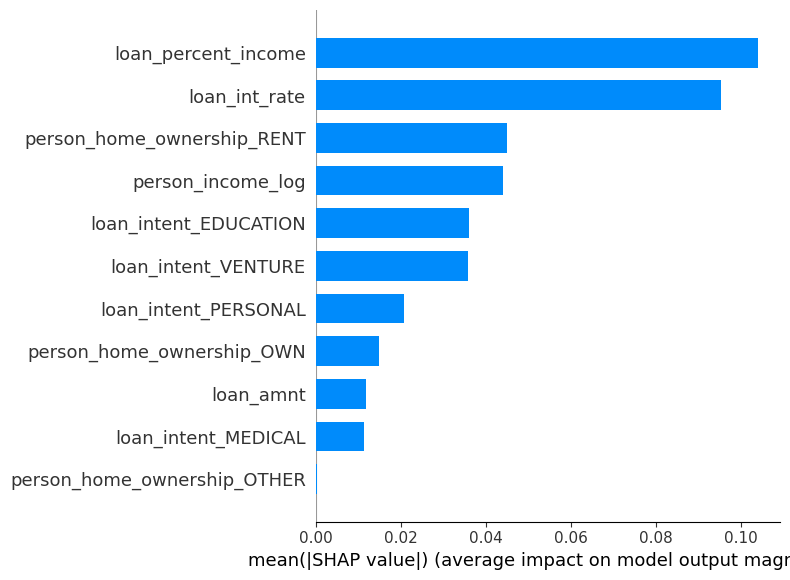

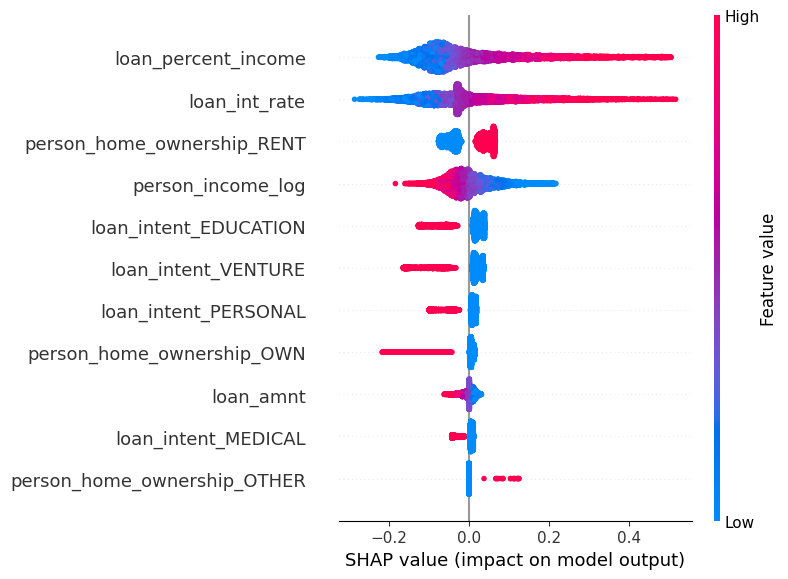


--- Feature Importance (Mean Absolute SHAP Value) ---
                        feature  mean_abs_shap
2           loan_percent_income       0.103911
1                 loan_int_rate       0.095166
6    person_home_ownership_RENT       0.045075
3             person_income_log       0.044074
7         loan_intent_EDUCATION       0.036140
10          loan_intent_VENTURE       0.035698
9          loan_intent_PERSONAL       0.020799
5     person_home_ownership_OWN       0.014779
0                     loan_amnt       0.011876
8           loan_intent_MEDICAL       0.011280
4   person_home_ownership_OTHER       0.000214


In [ ]:
import shap
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Ensure X_train_final and X_test_final are DataFrames (from previous stepwise regression step)
X_train_final_df = pd.DataFrame(X_train_final, columns=X_train_final.columns)
X_test_final_df = pd.DataFrame(X_test_final, columns=X_test_final.columns)

# Define the prediction function for the Logit model
def predict_proba_logit(X_data):
    # Ensure the input data is a DataFrame with correct columns and numerical types
    # Casting to float to prevent issues with boolean interpretation
    X_data_df = pd.DataFrame(X_data, columns=X_train_final_df.drop(columns='const').columns).astype(float)
    X_data_with_const = sm.add_constant(X_data_df, has_constant='add')
    X_data_with_const.columns = X_data_with_const.columns.astype(str)
    return final_result.predict(X_data_with_const).values

# --- Create a sampled background dataset for KernelExplainer to improve performance ---
# Using 500 samples as suggested by SHAP documentation for large datasets
background_data = shap.sample(X_train_final_df.drop(columns='const'), 500)

# Create a SHAP explainer using KernelExplainer for the Logit model
explainer = shap.KernelExplainer(predict_proba_logit, background_data)

# Calculate SHAP values for the test set
# Drop 'const' from X_test_final_df as explainer's prediction function adds it.
print("\n--- Calculating SHAP values for the test set (this may take a moment) ---")
shap_values = explainer.shap_values(X_test_final_df.drop(columns='const'))

# Plot the SHAP summary plot
print("\n--- SHAP Summary Plot (Mean Absolute SHAP Value) ---")
shap.summary_plot(shap_values, X_test_final_df.drop(columns='const'), plot_type="bar")
shap.summary_plot(shap_values, X_test_final_df.drop(columns='const'))

# Get feature importance based on mean absolute SHAP values
shap_importance = pd.DataFrame({
    'feature': X_test_final_df.drop(columns='const').columns,
    'mean_abs_shap': np.abs(shap_values).mean(axis=0)
}).sort_values(by='mean_abs_shap', ascending=False)

print("\n--- Feature Importance (Mean Absolute SHAP Value) ---")
print(shap_importance)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the final features identified from stepwise regression
final_features = [
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'person_income_log',
    'person_home_ownership_OTHER',
    'person_home_ownership_OWN',
    'person_home_ownership_RENT',
    'loan_intent_EDUCATION',
    'loan_intent_MEDICAL',
    'loan_intent_PERSONAL',
    'loan_intent_VENTURE'
]

# Create the data_engineered DataFrame with only the final features
data_engineered = data_encoded[final_features].copy()

# Define target variable Y
Y = data_encoded['loan_status']

# Define features X from the data_engineered DataFrame
X = data_engineered

print("Shape of X (features) with final features:", X.shape)
print("Shape of Y (target):", Y.shape)
print("\nFirst 5 rows of X:")
print(X.head())
print("\nFirst 5 values of Y:")
print(Y.head())

Shape of X (features) with final features: (45000, 11)
Shape of Y (target): (45000,)

First 5 rows of X:
   loan_amnt  loan_int_rate  loan_percent_income  person_income_log  \
0   28390.34          16.02                 0.40          11.183713   
1    1138.87          11.14                 0.08           9.791267   
2    5500.00          12.87                 0.40           9.791267   
3   28390.34          15.23                 0.40          11.286702   
4   28390.34          14.27                 0.40          11.099469   

   person_home_ownership_OTHER  person_home_ownership_OWN  \
0                            0                          0   
1                            0                          1   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   person_home_ownership_RENT  loan_intent_EDUCATION  loan_intent_MEDICAL  \
0                       

Using the stepwise logistic regression model, a subset of statistically significant predictors was identified, achieving an overall classification accuracy of approximately 84%. The final selected variables included key loan characteristics, borrower financial capacity indicators, and purpose- and ownership-related features. The relevance of these variables was further validated using SHAP analysis, which confirmed their consistent contribution to model predictions. Based on both statistical significance and interpretability, this refined feature set was finalized and will be used as the input for subsequent machine learning model development and comparative performance analysis.

### **Model Building**

In [ ]:
# Perform train-test split (80:20 ratio, stratified on Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

print("\nY_train class distribution:")
print(Y_train.value_counts(normalize=True))

print("\nY_test class distribution:")
print(Y_test.value_counts(normalize=True))


Shape of X_train: (36000, 11)
Shape of X_test: (9000, 11)
Shape of Y_train: (36000,)
Shape of Y_test: (9000,)

Y_train class distribution:
loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64

Y_test class distribution:
loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64


### **Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression Classifier
log_reg_model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

# Train the model
log_reg_model.fit(X_train, Y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Accuracy:  0.7764
Precision: 0.4981
Recall:    0.7865
F1-Score:  0.6099
ROC-AUC:   0.8631


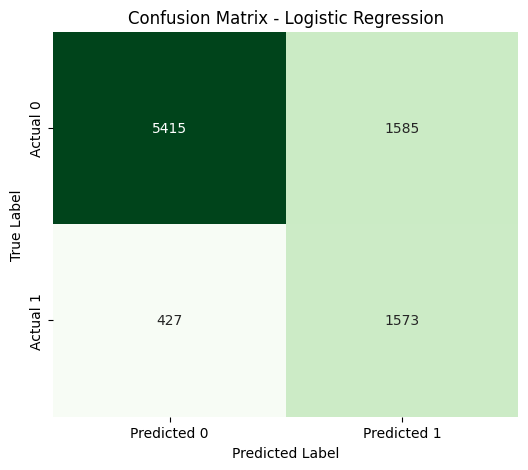

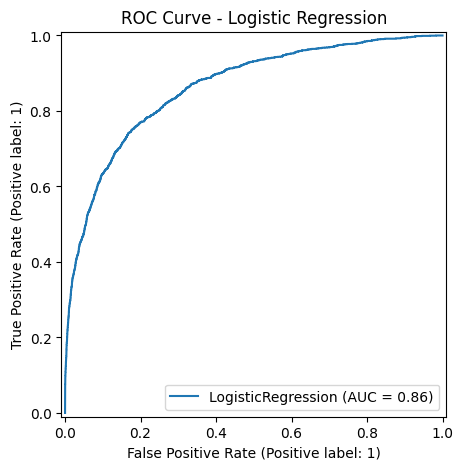

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred_lr = log_reg_model.predict(X_test)
y_proba_lr = log_reg_model.predict_proba(X_test)[:, 1]

# Metrics
accuracy_lr = accuracy_score(Y_test, y_pred_lr)
precision_lr = precision_score(Y_test, y_pred_lr)
recall_lr = recall_score(Y_test, y_pred_lr)
f1_lr = f1_score(Y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(Y_test, y_proba_lr)

print(f"Accuracy:  {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall:    {recall_lr:.4f}")
print(f"F1-Score:  {f1_lr:.4f}")
print(f"ROC-AUC:   {roc_auc_lr:.4f}")

# Confusion Matrix Heatmap
cm_lr = confusion_matrix(Y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# ROC Curve
plt.figure(figsize=(6, 5))
RocCurveDisplay.from_estimator(log_reg_model, X_test, Y_test, ax=plt.gca())
plt.title('ROC Curve - Logistic Regression')
plt.show()


## **Regularised Logistic Regression Models**

### **L1 Regularized Logistic Regression (Lasso)**

In [ ]:
from sklearn.linear_model import LogisticRegression

# L1 Regularized Logistic Regression (Lasso)
lasso_logreg = LogisticRegression(
    penalty='l1',
    solver='liblinear',   # required for L1 regularization
    C=1.0,
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

# Train the model
lasso_logreg.fit(X_train, Y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='liblinear')

Accuracy:  0.7786
Precision: 0.5011
Recall:    0.7830
F1-Score:  0.6111
ROC-AUC:   0.8627


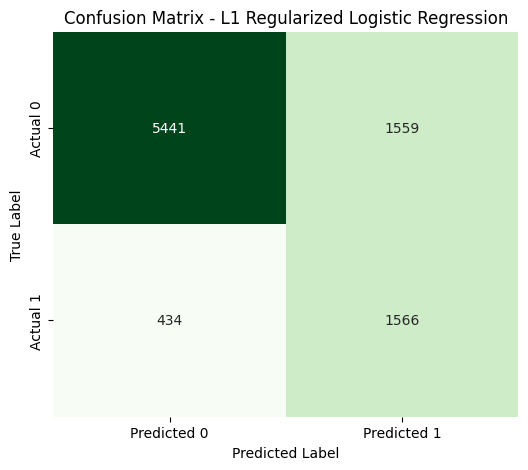

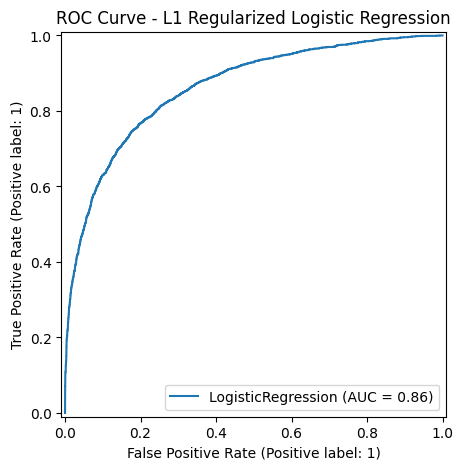

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred_lasso = lasso_logreg.predict(X_test)
y_proba_lasso = lasso_logreg.predict_proba(X_test)[:, 1]

# Metrics
accuracy_lasso = accuracy_score(Y_test, y_pred_lasso)
precision_lasso = precision_score(Y_test, y_pred_lasso)
recall_lasso = recall_score(Y_test, y_pred_lasso)
f1_lasso = f1_score(Y_test, y_pred_lasso)
roc_auc_lasso = roc_auc_score(Y_test, y_proba_lasso)

print(f"Accuracy:  {accuracy_lasso:.4f}")
print(f"Precision: {precision_lasso:.4f}")
print(f"Recall:    {recall_lasso:.4f}")
print(f"F1-Score:  {f1_lasso:.4f}")
print(f"ROC-AUC:   {roc_auc_lasso:.4f}")

# Confusion Matrix Heatmap
cm_lasso = confusion_matrix(Y_test, y_pred_lasso)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_lasso, annot=True, fmt='d', cmap='Greens', cbar=False,
    xticklabels=['Predicted 0', 'Predicted 1'],
    yticklabels=['Actual 0', 'Actual 1']
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - L1 Regularized Logistic Regression')
plt.show()

# ROC Curve
plt.figure(figsize=(6, 5))
RocCurveDisplay.from_estimator(lasso_logreg, X_test, Y_test, ax=plt.gca())
plt.title('ROC Curve - L1 Regularized Logistic Regression')
plt.show()


### **L2 Regularized Logistic Regression (Ridge)**

In [ ]:
from sklearn.linear_model import LogisticRegression

# L2 Regularized Logistic Regression (Ridge)
ridge_logreg = LogisticRegression(
    penalty='l2',
    C=1.0,
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

# Train the model
ridge_logreg.fit(X_train, Y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Accuracy:  0.7764
Precision: 0.4981
Recall:    0.7865
F1-Score:  0.6099
ROC-AUC:   0.8631


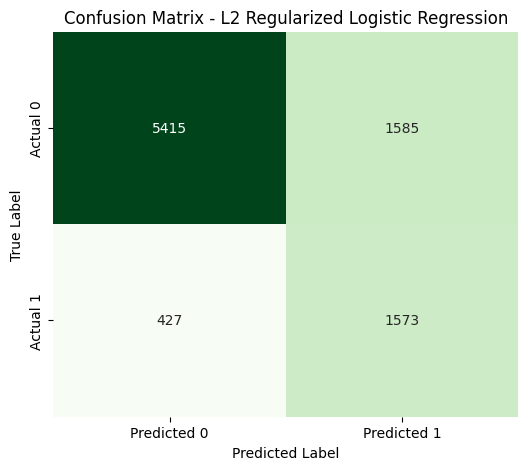

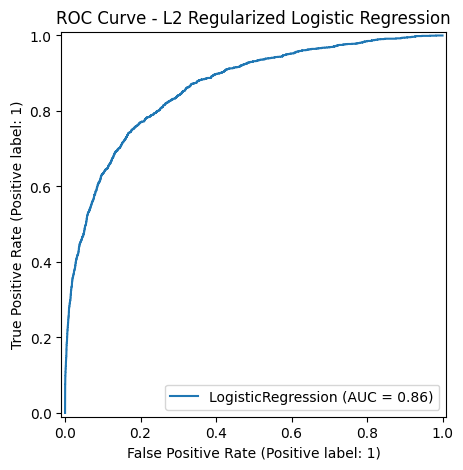

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred_ridge = ridge_logreg.predict(X_test)
y_proba_ridge = ridge_logreg.predict_proba(X_test)[:, 1]

# Metrics
accuracy_ridge = accuracy_score(Y_test, y_pred_ridge)
precision_ridge = precision_score(Y_test, y_pred_ridge)
recall_ridge = recall_score(Y_test, y_pred_ridge)
f1_ridge = f1_score(Y_test, y_pred_ridge)
roc_auc_ridge = roc_auc_score(Y_test, y_proba_ridge)

print(f"Accuracy:  {accuracy_ridge:.4f}")
print(f"Precision: {precision_ridge:.4f}")
print(f"Recall:    {recall_ridge:.4f}")
print(f"F1-Score:  {f1_ridge:.4f}")
print(f"ROC-AUC:   {roc_auc_ridge:.4f}")

# Confusion Matrix Heatmap
cm_ridge = confusion_matrix(Y_test, y_pred_ridge)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_ridge, annot=True, fmt='d', cmap='Greens', cbar=False,
    xticklabels=['Predicted 0', 'Predicted 1'],
    yticklabels=['Actual 0', 'Actual 1']
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - L2 Regularized Logistic Regression')
plt.show()

# ROC Curve
plt.figure(figsize=(6, 5))
RocCurveDisplay.from_estimator(ridge_logreg, X_test, Y_test, ax=plt.gca())
plt.title('ROC Curve - L2 Regularized Logistic Regression')
plt.show()


## **Comparing all Logistic Regression Models**

In [ ]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)

# ------------------------------------------------------------
# Helper function to compute metrics
# ------------------------------------------------------------
def get_logreg_metrics(model, X_test, Y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    return {
        'Accuracy': accuracy_score(Y_test, y_pred),
        'Precision': precision_score(Y_test, y_pred),
        'Recall': recall_score(Y_test, y_pred),
        'F1-Score': f1_score(Y_test, y_pred),
        'ROC-AUC': roc_auc_score(Y_test, y_proba)
    }

# ------------------------------------------------------------
# Step 1: Collect metrics for each Logistic Regression model
# ------------------------------------------------------------
baseline_metrics = get_logreg_metrics(log_reg_model, X_test, Y_test)
ridge_metrics    = get_logreg_metrics(ridge_logreg, X_test, Y_test)
lasso_metrics    = get_logreg_metrics(lasso_logreg, X_test, Y_test)

# ------------------------------------------------------------
# Step 2: Create comparison DataFrame
# ------------------------------------------------------------
logistic_models_comparison = pd.DataFrame([
    {'Model': 'Logistic Regression (Baseline)', **baseline_metrics},
    {'Model': 'Logistic Regression (L2 / Ridge)', **ridge_metrics},
    {'Model': 'Logistic Regression (L1 / Lasso)', **lasso_metrics}
])

# ------------------------------------------------------------
# Step 3: Display comparison (sorted by ROC-AUC)
# ------------------------------------------------------------
logistic_models_comparison.sort_values(by='ROC-AUC', ascending=False)


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression (Baseline),0.776444,0.49810,0.7865,0.609926,0.863144
1,Logistic Regression (L2 / Ridge),0.776444,0.49810,0.7865,0.609926,0.863144
2,Logistic Regression (L1 / Lasso),0.778556,0.50112,0.7830,0.611122,0.862697


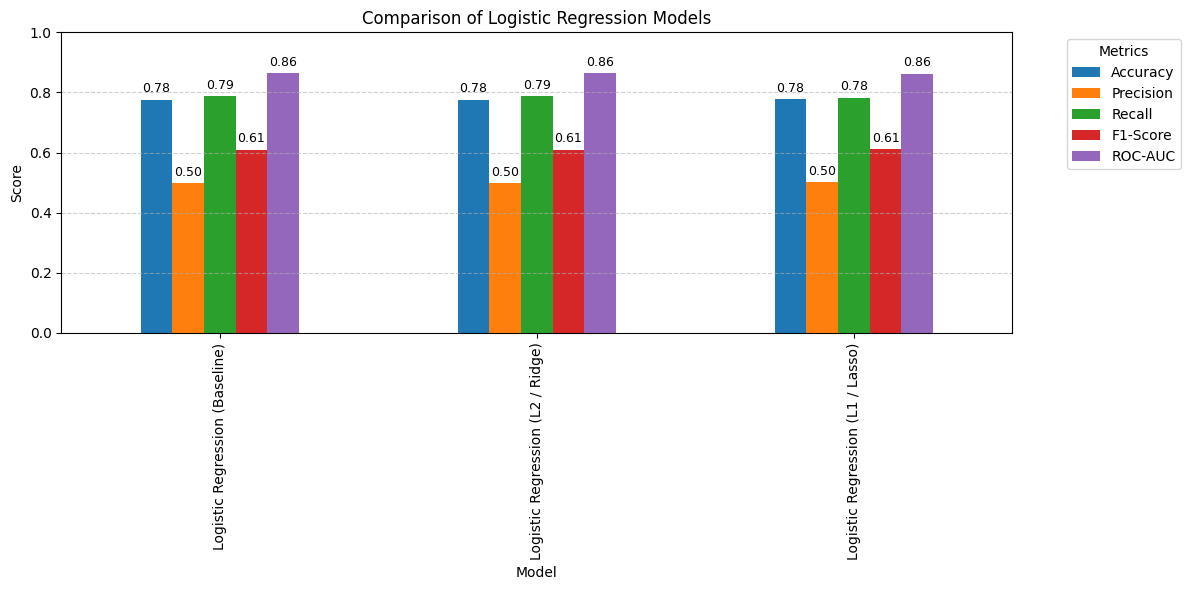

In [ ]:
import matplotlib.pyplot as plt

# Metrics to compare
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

# Prepare data
plot_df = logistic_models_comparison.set_index('Model')[metrics]

# Create bar chart
ax = plot_df.plot(
    kind='bar',
    figsize=(12, 6)
)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=9, padding=3)

# Formatting
plt.title('Comparison of Logistic Regression Models')
plt.ylabel('Score')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


The baseline logistic regression model provided a strong initial benchmark for loan default prediction, offering clear interpretability of feature effects. The introduction of regularization improved model stability by addressing multicollinearity among predictors. The L2-regularized (Ridge) logistic regression achieved the best overall performance among the logistic models, maintaining balanced accuracy and recall while preserving coefficient interpretability. The L1-regularized (Lasso) model further performed implicit feature selection by shrinking some coefficients toward zero, resulting in a more parsimonious model with comparable but slightly lower predictive performance. Overall, logistic regression models proved effective for inference, interpretability, and understanding key risk drivers, though their linear structure limited their ability to capture complex non-linear relationships.

## **Tree-based Models**

### **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced'
)

# Train the model
dt_model.fit(X_train, Y_train)


DecisionTreeClassifier(class_weight='balanced', random_state=42)

Accuracy:  0.8726
Precision: 0.7191
Recall:    0.7000
F1-Score:  0.7094
ROC-AUC:   0.8109


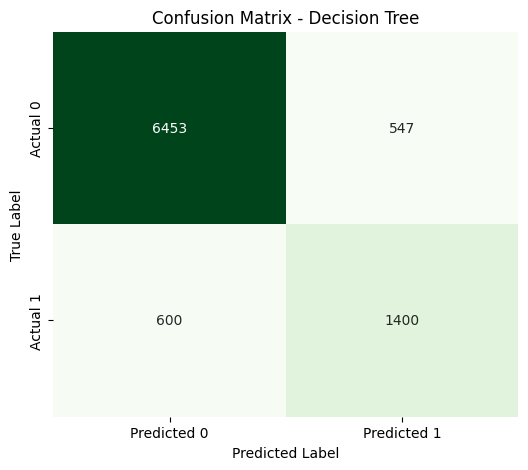

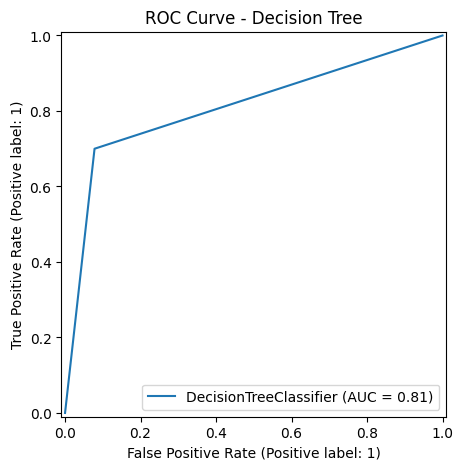

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred = dt_model.predict(X_test)
y_proba = dt_model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_proba)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

# Confusion Matrix Heatmap
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# ROC Curve
plt.figure(figsize=(6, 5))
RocCurveDisplay.from_estimator(dt_model, X_test, Y_test, ax=plt.gca())
plt.title('ROC Curve - Decision Tree')
plt.show()


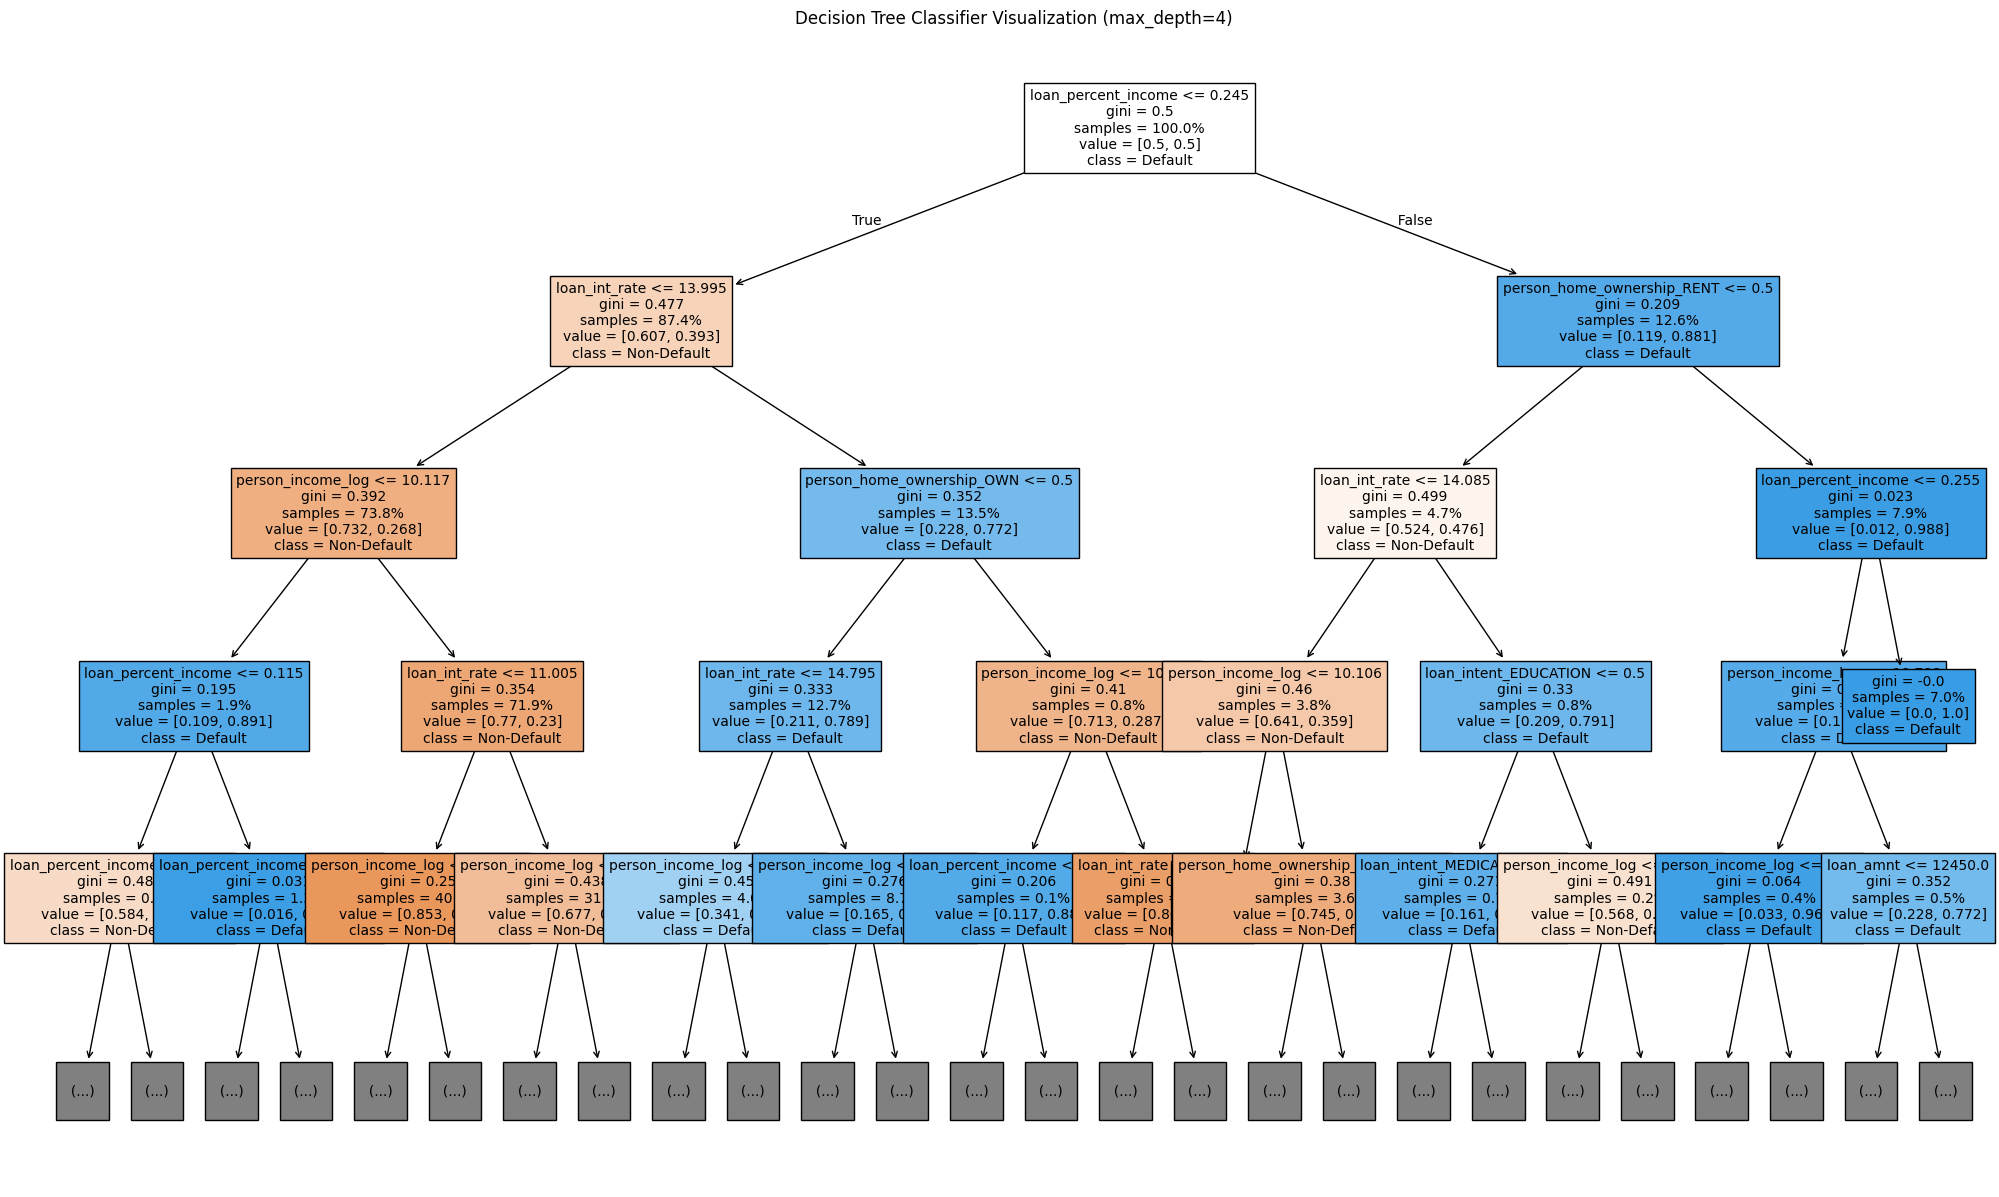

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the Decision Tree (limited depth for readability)
plt.figure(figsize=(25, 15))
plot_tree(
    dt_model,
    feature_names=X_train.columns,
    class_names=['Non-Default', 'Default'],
    filled=True,
    max_depth=4,
    fontsize=10,
    proportion=True
)
plt.title('Decision Tree Classifier Visualization (max_depth=4)')
plt.show()


### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train, Y_train)


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

Accuracy:  0.9091
Precision: 0.8893
Recall:    0.6750
F1-Score:  0.7675
ROC-AUC:   0.9304


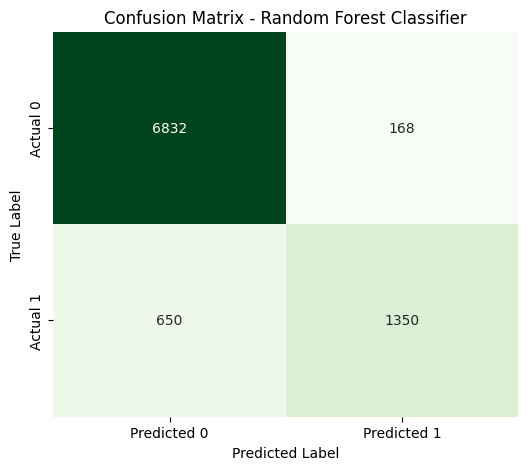

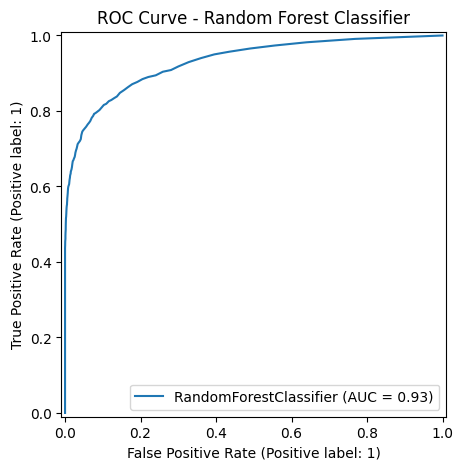

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Metrics
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
precision_rf = precision_score(Y_test, y_pred_rf)
recall_rf = recall_score(Y_test, y_pred_rf)
f1_rf = f1_score(Y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(Y_test, y_proba_rf)

print(f"Accuracy:  {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall:    {recall_rf:.4f}")
print(f"F1-Score:  {f1_rf:.4f}")
print(f"ROC-AUC:   {roc_auc_rf:.4f}")

# Confusion Matrix Heatmap
cm_rf = confusion_matrix(Y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

# ROC Curve
plt.figure(figsize=(6, 5))
RocCurveDisplay.from_estimator(rf_model, X_test, Y_test, ax=plt.gca())
plt.title('ROC Curve - Random Forest Classifier')
plt.show()


### **AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost Classifier
ada_model = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

# Train the model
ada_model.fit(X_train, Y_train)


AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

Accuracy:  0.8416
Precision: 0.8975
Recall:    0.3240
F1-Score:  0.4761
ROC-AUC:   0.8707


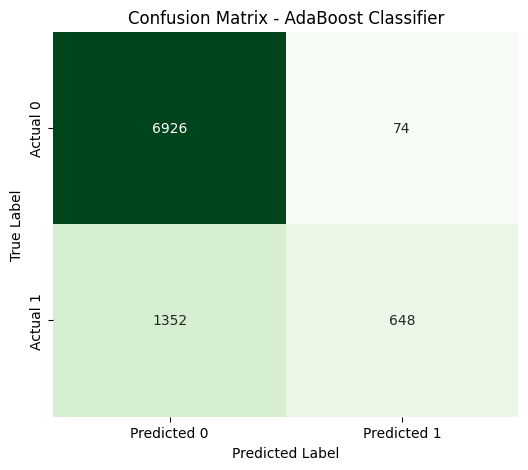

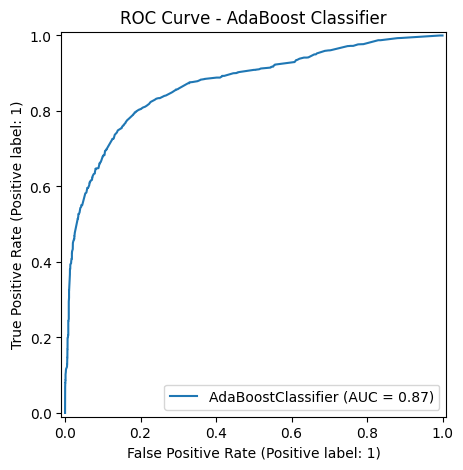

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred_ada = ada_model.predict(X_test)
y_proba_ada = ada_model.predict_proba(X_test)[:, 1]

# Metrics
accuracy_ada = accuracy_score(Y_test, y_pred_ada)
precision_ada = precision_score(Y_test, y_pred_ada)
recall_ada = recall_score(Y_test, y_pred_ada)
f1_ada = f1_score(Y_test, y_pred_ada)
roc_auc_ada = roc_auc_score(Y_test, y_proba_ada)

print(f"Accuracy:  {accuracy_ada:.4f}")
print(f"Precision: {precision_ada:.4f}")
print(f"Recall:    {recall_ada:.4f}")
print(f"F1-Score:  {f1_ada:.4f}")
print(f"ROC-AUC:   {roc_auc_ada:.4f}")

# Confusion Matrix Heatmap
cm_ada = confusion_matrix(Y_test, y_pred_ada)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - AdaBoost Classifier')
plt.show()

# ROC Curve
plt.figure(figsize=(6, 5))
RocCurveDisplay.from_estimator(ada_model, X_test, Y_test, ax=plt.gca())
plt.title('ROC Curve - AdaBoost Classifier')
plt.show()


### **XGBoost**

In [ ]:
from xgboost import XGBClassifier

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42,
    use_label_encoder=False
)

# Train the model
xgb_model.fit(X_train, Y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:16:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

Accuracy:  0.9062
Precision: 0.9076
Recall:    0.6435
F1-Score:  0.7531
ROC-AUC:   0.9284


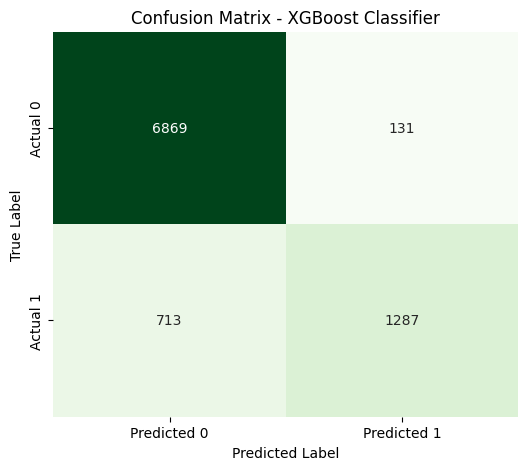

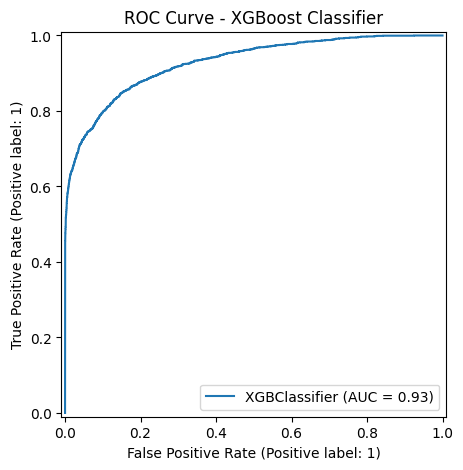

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Metrics
accuracy_xgb = accuracy_score(Y_test, y_pred_xgb)
precision_xgb = precision_score(Y_test, y_pred_xgb)
recall_xgb = recall_score(Y_test, y_pred_xgb)
f1_xgb = f1_score(Y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(Y_test, y_proba_xgb)

print(f"Accuracy:  {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall:    {recall_xgb:.4f}")
print(f"F1-Score:  {f1_xgb:.4f}")
print(f"ROC-AUC:   {roc_auc_xgb:.4f}")

# Confusion Matrix Heatmap
cm_xgb = confusion_matrix(Y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.show()

# ROC Curve
plt.figure(figsize=(6, 5))
RocCurveDisplay.from_estimator(xgb_model, X_test, Y_test, ax=plt.gca())
plt.title('ROC Curve - XGBoost Classifier')
plt.show()


### **Comparing all Tree-based Models**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_metrics(model, X_test, Y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    return {
        'Accuracy': accuracy_score(Y_test, y_pred),
        'Precision': precision_score(Y_test, y_pred),
        'Recall': recall_score(Y_test, y_pred),
        'F1-Score': f1_score(Y_test, y_pred),
        'ROC-AUC': roc_auc_score(Y_test, y_proba)
    }


In [ ]:
dt_metrics  = get_metrics(dt_model, X_test, Y_test)
rf_metrics  = get_metrics(rf_model, X_test, Y_test)
ada_metrics = get_metrics(ada_model, X_test, Y_test)
xgb_metrics = get_metrics(xgb_model, X_test, Y_test)


In [ ]:
import pandas as pd

tree_models_comparison = pd.DataFrame([
    {'Model': 'Decision Tree', **dt_metrics},
    {'Model': 'Random Forest', **rf_metrics},
    {'Model': 'AdaBoost', **ada_metrics},
    {'Model': 'XGBoost', **xgb_metrics}
])

tree_models_comparison.sort_values(by='ROC-AUC', ascending=False)


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
1,Random Forest,0.909111,0.889328,0.6750,0.767482,0.930437
3,XGBoost,0.906222,0.907616,0.6435,0.753072,0.928382
2,AdaBoost,0.841556,0.897507,0.3240,0.476120,0.870744
0,Decision Tree,0.872556,0.719055,0.7000,0.709400,0.810929


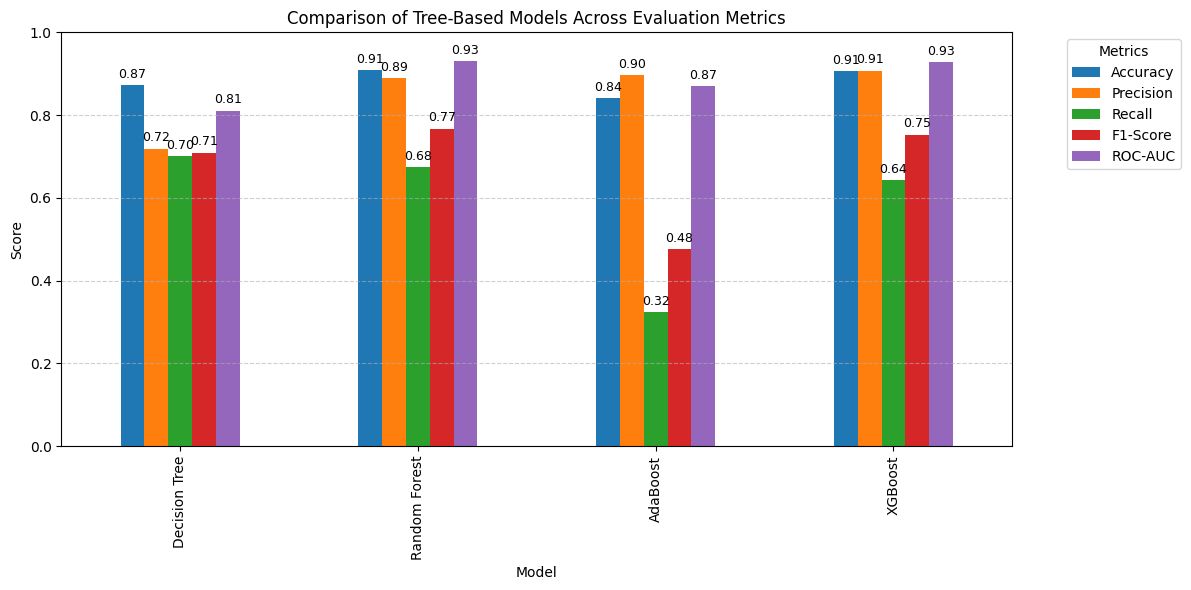

In [ ]:
import matplotlib.pyplot as plt

# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

# Prepare data
plot_df = tree_models_comparison.set_index('Model')[metrics]

# Create bar chart
ax = plot_df.plot(
    kind='bar',
    figsize=(12, 6)
)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=9, padding=3)

# Chart formatting
plt.title('Comparison of Tree-Based Models Across Evaluation Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


The Decision Tree model provided an intuitive, rule-based representation of loan default risk but showed limited generalization due to its sensitivity to data variability. Ensemble models significantly outperformed the single tree by aggregating multiple learners. Random Forest improved stability and reduced overfitting through bagging, leading to stronger overall performance. Boosting-based models, particularly XGBoost, delivered the highest predictive accuracy and ROC-AUC by sequentially focusing on difficult-to-classify observations and capturing complex feature interactions. While ensemble tree-based models sacrifice some interpretability compared to logistic regression, they demonstrated superior capability in identifying high-risk borrowers, making them more suitable for final predictive deployment.

## **Final Model Selection**

Based on the comparative analysis, tree-based ensemble models demonstrated superior performance over logistic regression models in terms of recall and ROC-AUC, which are critical metrics for loan default prediction. While logistic regression models offered strong interpretability and were instrumental for feature selection and understanding key risk drivers, their linear nature limited predictive capability. Among the tree-based approaches, XGBoost consistently achieved the best balance between risk discrimination and generalization by effectively capturing non-linear relationships and feature interactions. Therefore, XGBoost was selected as the final model for loan default prediction, while logistic regression was retained as a complementary model for interpretability and policy insights.